This project explores river hydrology and water quality in Lithuania.  
Neris was selected from overall dataset with selected measurements: temperature, pH, dissolved oxygen, dissolved substances, alkalinity, electric conductivity and date of measurement. 
 
GOALS
1.	Assess water quality trends over time, focusing on seasonal and long-term patterns in variables such as dissolved oxygen, alkalinity, pH, dissolved substances, electrical conductivity and temperature.
2.	Investigate and address missing data, applying appropriate imputation techniques while evaluating their impact on results.
3.	Explore interdependencies between water quality indicators (temperature and oxygen saturation, alkalinity and pH, alkalinity and elctrical conductivity) to better understand ecological dynamics.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

1. Load and Inspect Data

In [38]:
rivers_data = pd.read_csv('../data/RawdataUpiuValstybinioMonitoringoDuomenys.csv')

# Quick look at the data
print(rivers_data.shape)
rivers_data.head(10)
# Inspecting the posibilities of rivers data
print(rivers_data['telkinio_pav'].unique())
# Inspect column info and data types
print(rivers_data.dtypes)


(7265, 179)
['Grūda' 'Nevėžis' 'Armona' 'NERIS' 'Įstras' 'Beržtalis' 'Kražantė'
 'Šešupė' 'Ringuva' 'Jūra' 'Kurtuva' 'Sidabra' 'Snietala' 'Geluža'
 'NEMUNAS' 'Gausantė' 'Dubysa' 'Kulšė' 'Seimena' 'Žvirgždė' 'Pala'
 'Jotija' 'Mituva' 'Amata' 'Upytė' 'Lėvuo' 'Lapišė' 'Laikštė' 'Mūša'
 '\xa0Punelė' 'Šušvė' 'Nemunėlis' 'Beržė' 'Rudamina' 'Šaltuona' 'Agluona'
 'Merkys' 'Šiladis' 'Saria' 'Pyvesa' 'Ašva' 'Rovėja' 'Zembrė' 'Švėtelė'
 'Zdoniškių upelis' 'Nasvė' 'Šventoji' 'Šiaušė' 'Gynėvė' 'Daugyvenė'
 'Kupa' 'Suosa' 'Plonė' 'Voryčia' 'Platonis' 'Skroblus' 'Milupė'
 'Dotnuvėlė' 'Akmena - Danė' 'Patekla' 'Nova' 'Molaina' 'Minija'
 'Skirvytė' 'Bebirva' 'Ežerėlė' 'Šyša' 'Letausas' 'Venta' 'Lomena'
 'Viešinta' 'Tenžė' 'Virvyčia' 'Višakis' 'Mažupė' 'Žeimena' 'Vilka'
 'Skodinys' 'Kena' 'Vilnia' 'Tatula' 'Sruoja' 'Šata' 'Veiviržas' 'Juosta'
 'Barupė' 'Paikis' 'Liulys' 'Šuoja - Kurys' 'Vadaktis' 'Bartuva' 'Kulpė'
 'Kruostas' 'Vyžuona' 'Varduva' 'Juoda' 'Lokys' 'Šaka' 'Kirkšnovė'
 'Vejuona' 'Raišupis' '

C:\Users\user\AppData\Local\Temp\ipykernel_15612\1495587181.py:1: DtypeWarning: Columns (3,14,34,169) have mixed types. Specify dtype option on import or set low_memory=False.
  rivers_data = pd.read_csv('../data/RawdataUpiuValstybinioMonitoringoDuomenys.csv')


River Neris was selected for data analysis.

1.1 Filtering data for the selected river Neris. Filtering selected columns from data set.

In [39]:
data_Neris = rivers_data[rivers_data['telkinio_pav'].isin(['NERIS'])][['_id', 'telkinio_pav', 'm_vietos_pav', 'data', 'debitas', 'sroves_greitis', 'vandens_temp', 'suspend_medziagos', 'sarmingumas', 'deguon_istirpes', 'ph', 'elektr_laidis']]
print(data_Neris.shape)
print(data_Neris.dtypes)

(269, 12)
_id                   object
telkinio_pav          object
m_vietos_pav          object
data                  object
debitas               object
sroves_greitis        object
vandens_temp         float64
suspend_medziagos     object
sarmingumas          float64
deguon_istirpes       object
ph                   float64
elektr_laidis        float64
dtype: object


2. Data Cleaning
- Converting date column to datetime  
- Checking for missing values  
- Looking up for duplicates  

In [40]:
# Convert date column for river Neris
data_Neris['data'] = pd.to_datetime(data_Neris['data'], errors='coerce')

# Missing values for river Neris
print(data_Neris.isna().sum())

# Duplicates for river Neris
print("Duplicate rows:", data_Neris.duplicated().sum())

# Convert numeric columns from objects to floats, so it is possible to plot them
for col in ['suspend_medziagos', 'deguon_istirpes']:
    data_Neris[col] = pd.to_numeric(data_Neris[col], errors='coerce')
print(data_Neris.dtypes)



_id                   0
telkinio_pav          0
m_vietos_pav          0
data                  0
debitas              52
sroves_greitis       64
vandens_temp         22
suspend_medziagos    37
sarmingumas          37
deguon_istirpes      23
ph                   22
elektr_laidis        22
dtype: int64
Duplicate rows: 0
_id                          object
telkinio_pav                 object
m_vietos_pav                 object
data                 datetime64[ns]
debitas                      object
sroves_greitis               object
vandens_temp                float64
suspend_medziagos           float64
sarmingumas                 float64
deguon_istirpes             float64
ph                          float64
elektr_laidis               float64
dtype: object


2.1 Missing Data Handling
Before analysis, there is a need to deal with missing values in the dataset.

In [41]:
# Percentage of missing values per column
missing_percent_Neris = (data_Neris.isna().mean() * 100).sort_values(ascending=False)
print("\nPercentage of missing values per column Neris:\n")
print(missing_percent_Neris)


# Droping columns with too many missing data across all data sets ('sroves_greitis' and 'debitas')
data_Neris_clean = data_Neris.drop(columns=['sroves_greitis', 'debitas'])



Percentage of missing values per column Neris:

sroves_greitis       23.791822
debitas              19.330855
suspend_medziagos    17.472119
sarmingumas          13.754647
deguon_istirpes       8.550186
vandens_temp          8.178439
ph                    8.178439
elektr_laidis         8.178439
_id                   0.000000
telkinio_pav          0.000000
m_vietos_pav          0.000000
data                  0.000000
dtype: float64


3. Checking the distribution of data with missing values in order to decide the data filling technique. Filling data gaps. Also evaluating seasonal trends from visualised data.

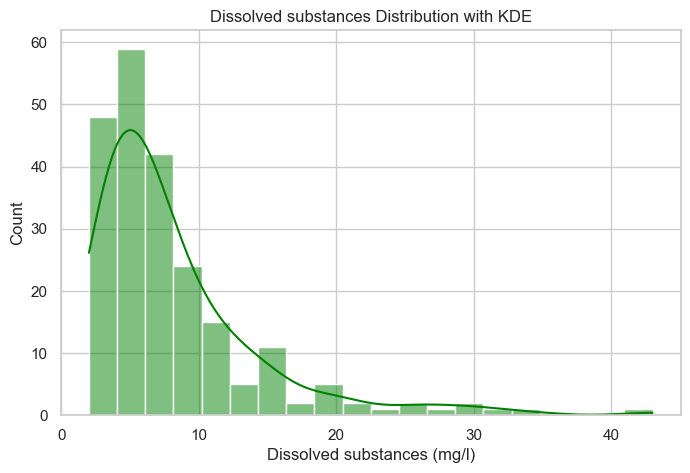

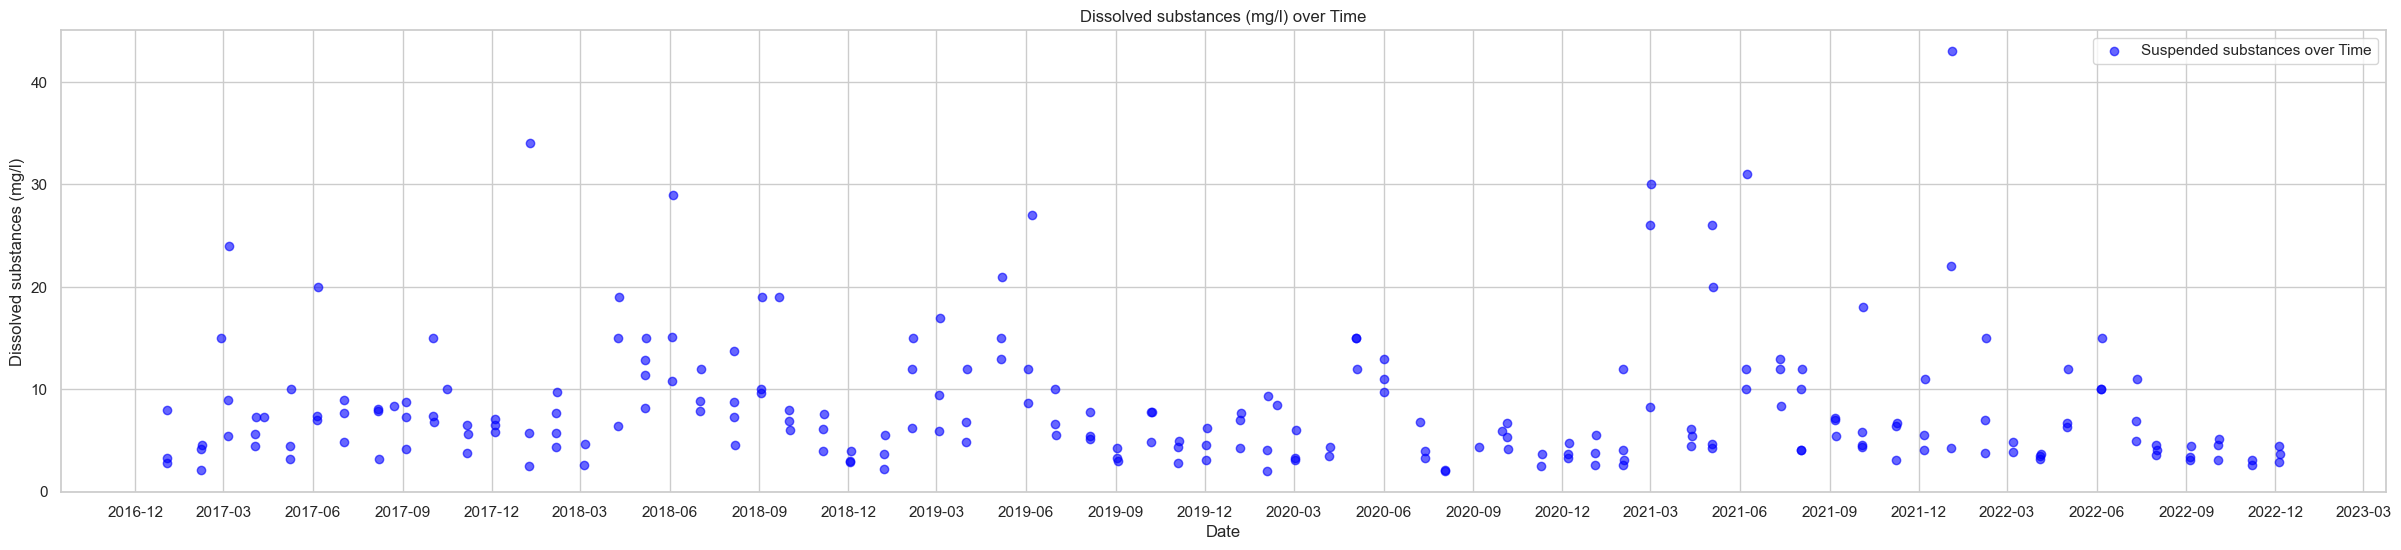

C:\Users\user\AppData\Local\Temp\ipykernel_15612\3583543427.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['suspend_medziagos'] = data_Neris_clean_filled['suspend_medziagos'].fillna(method ='ffill')


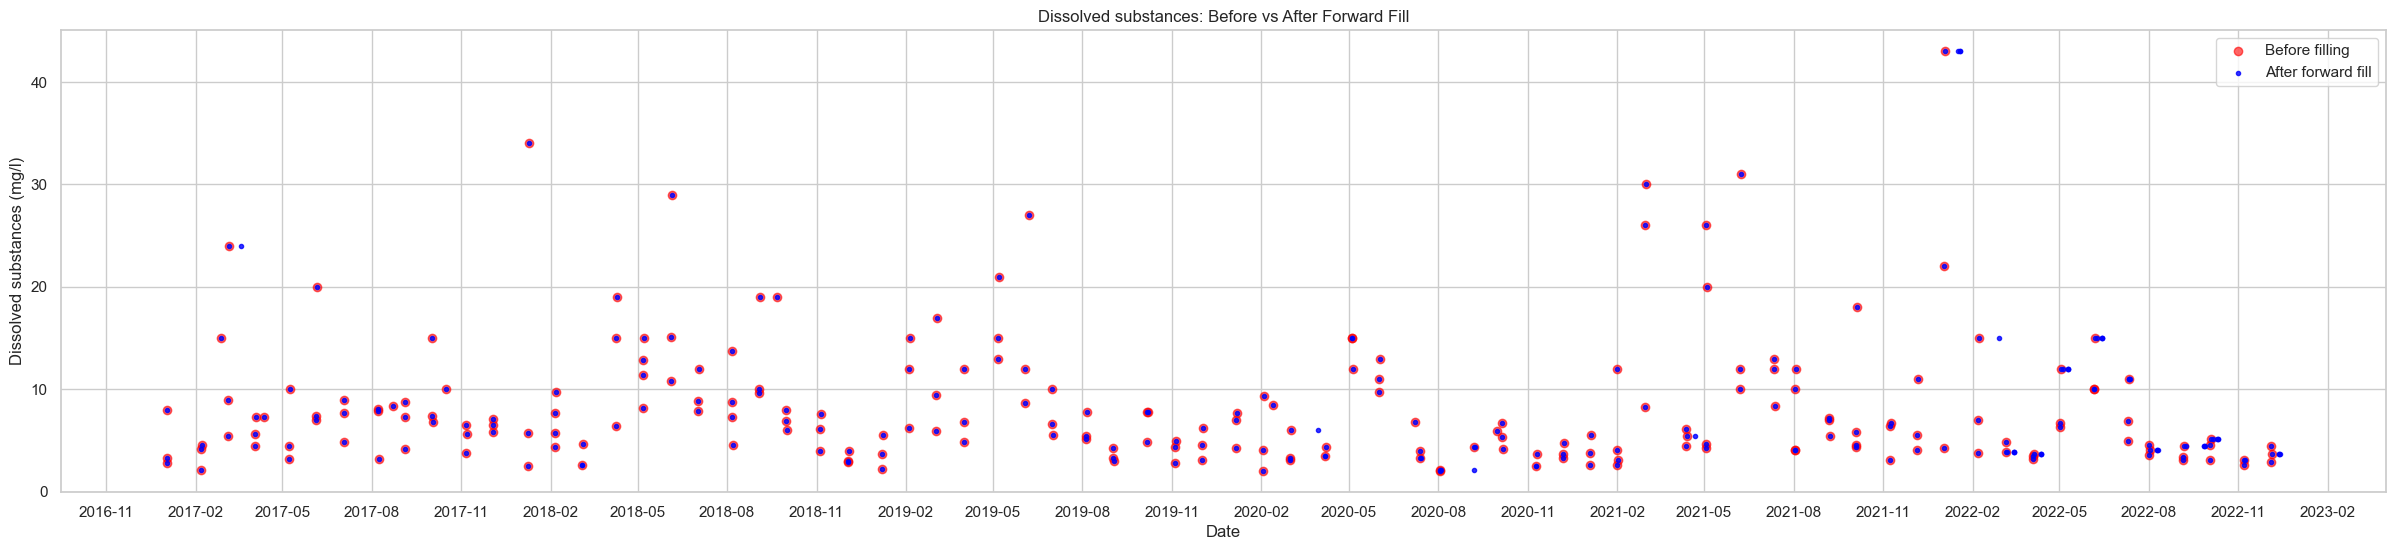

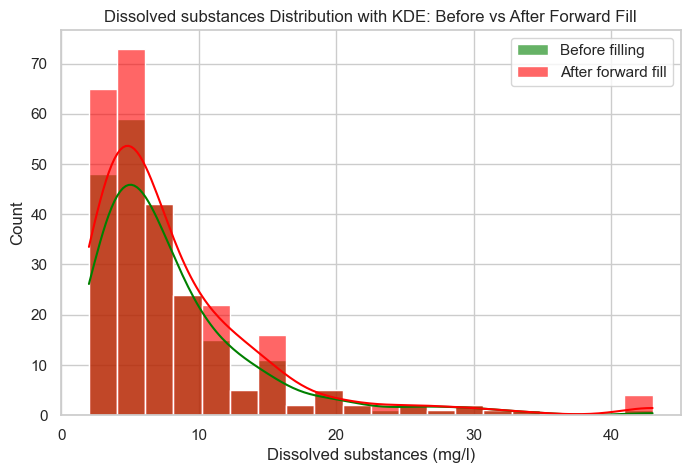

Before filling mean: 8.1518018018018
After filling mean: 8.33531598513011
Before filling median: 6.25
After filling median: 5.9


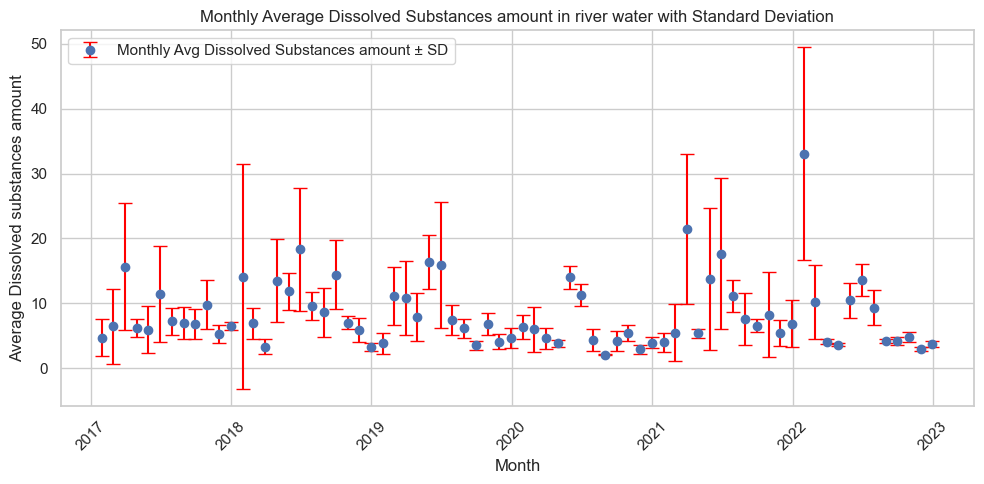

In [42]:
#Dissolved substances in Neris dataset
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['suspend_medziagos'], bins=20, kde=True, color='green')
plt.title("Dissolved substances Distribution with KDE")
plt.xlabel("Dissolved substances (mg/l)")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of dissolved substances over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['suspend_medziagos'], label="Suspended substances over Time", alpha=0.6, color='blue')
plt.title("Dissolved substances (mg/l) over Time")
plt.xlabel("Date")
plt.ylabel("Dissolved substances (mg/l)")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()


# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['suspend_medziagos'] = data_Neris_clean_filled['suspend_medziagos'].fillna(method ='ffill')

#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['suspend_medziagos'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['suspend_medziagos'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("Dissolved substances: Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("Dissolved substances (mg/l)")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['suspend_medziagos'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['suspend_medziagos'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("Dissolved substances Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("Dissolved substances (mg/l)")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking means and medians before and after data filling
print("Before filling mean:", data_Neris_clean['suspend_medziagos'].mean())
print("After filling mean:", data_Neris_clean_filled['suspend_medziagos'].mean())
print("Before filling median:", data_Neris_clean['suspend_medziagos'].median())
print("After filling median:", data_Neris_clean_filled['suspend_medziagos'].median())

# Set Date as index 
data_Neris_clean_filled.set_index('data', inplace=True)
# Resample by month to get mean and std 
monthly_stats_dissolvedsubs = data_Neris_clean_filled['suspend_medziagos'].resample('ME').agg(['mean', 'std'])
# Plotting as scatter with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(
    monthly_stats_dissolvedsubs.index, 
    monthly_stats_dissolvedsubs['mean'], 
    yerr=monthly_stats_dissolvedsubs['std'], 
    fmt='o',        # scatter markers
    ecolor='red',   # color of error bars
    capsize=5,      # caps on error bars
    markersize=6,
    label='Monthly Avg Dissolved Substances amount ± SD'
)

plt.title('Monthly Average Dissolved Substances amount in river water with Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Average Dissolved substances amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The dissolved materials dataset represents a continuous time series for the Neris River, with missing values addressed using forward fill (ffill) to preserve temporal continuity. Based on general hydrological and biological principles, one would expect higher concentrations of dissolved substances in winter months (November–February), due to increased runoff and reduced biological uptake, while summer months (May–August) might show moderate peaks from evaporation or low-flow concentration effects. Observed data are relatively noisy, making clear seasonal patterns difficult to identify, but there are indications of higher concentrations between May and August in some years, which could reflect seasonal runoff, catchment inputs, or biological dynamics. Despite this variability, the forward fill (blue) closely matches the original data (red), confirming that the method preserved the inherent fluctuations without distorting the temporal dynamics. This comparison between expected seasonal trends and observed data highlights the complex interplay of environmental factors affecting dissolved substances in the river.

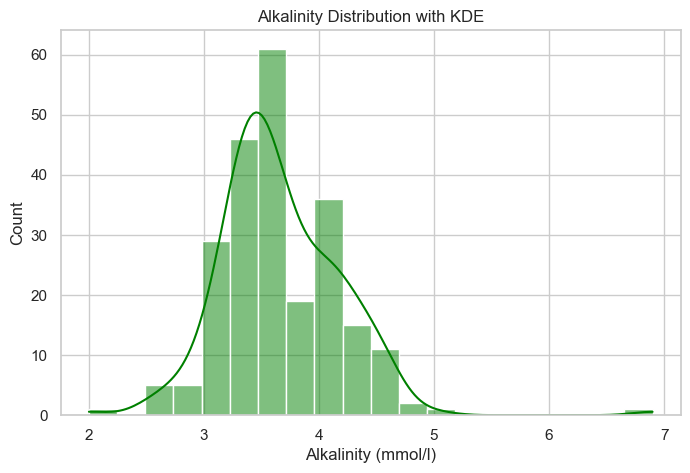

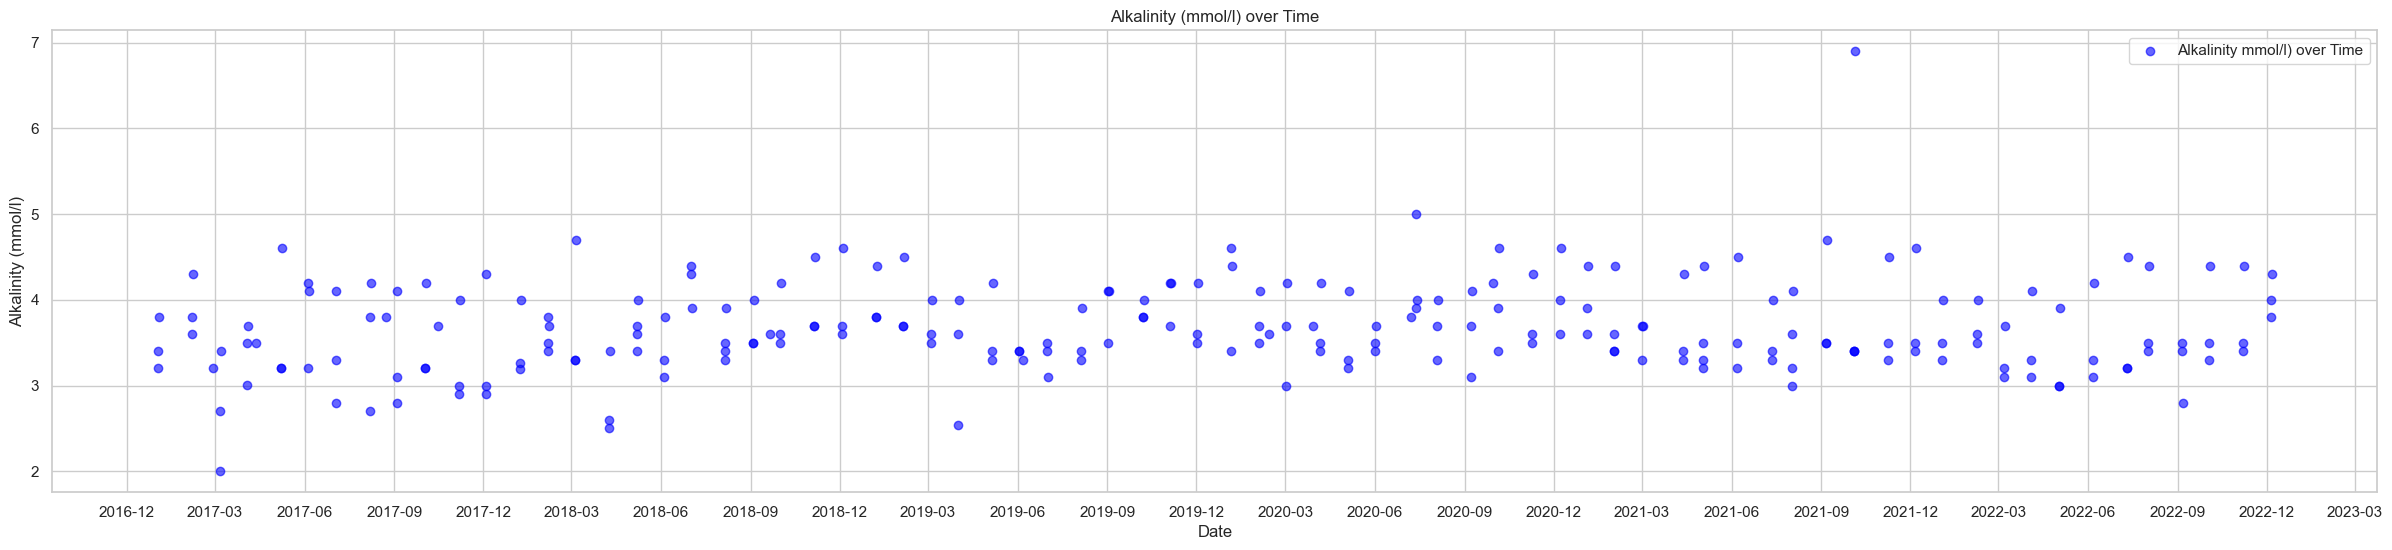

C:\Users\user\AppData\Local\Temp\ipykernel_15612\2282835839.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['sarmingumas'] = data_Neris_clean_filled['sarmingumas'].fillna(method ='ffill')


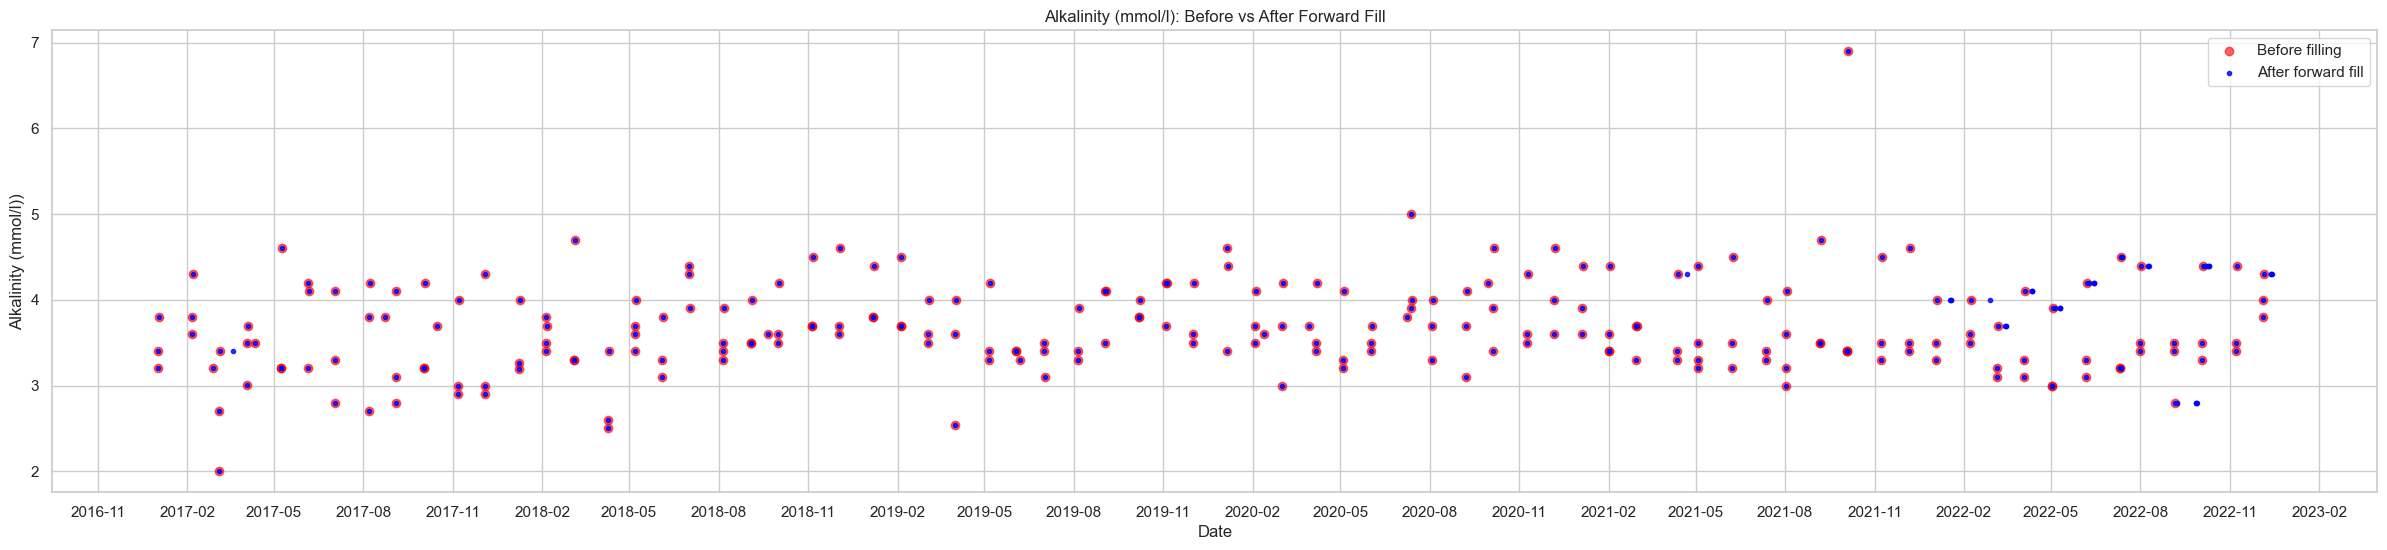

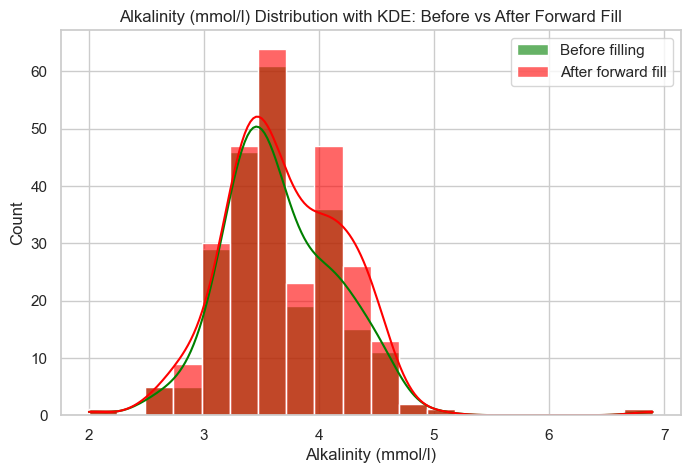

Before filling mean: 3.6646551724137932
After filling mean: 3.7055762081784387
Before filling median: 3.6
After filling median: 3.7


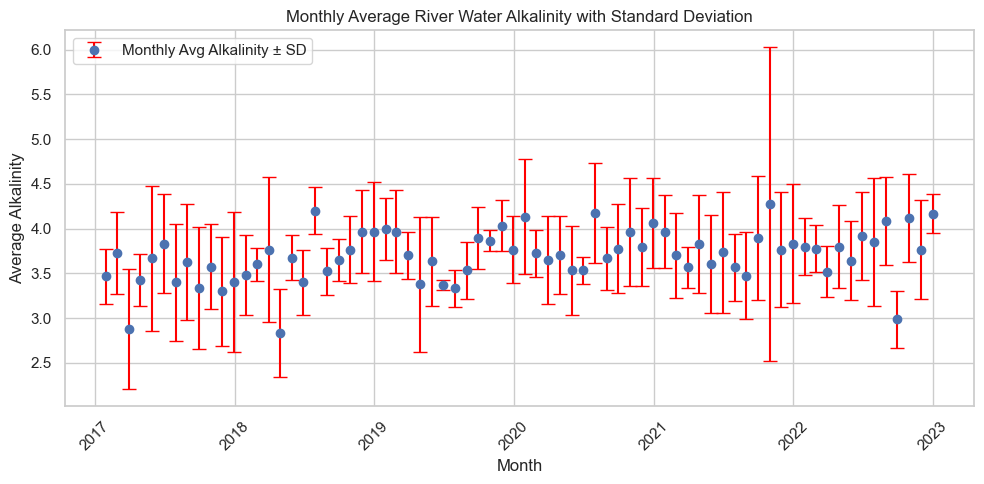

In [43]:

#Alkalinity in Neris dataset

plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['sarmingumas'], bins=20, kde=True, color='green')
plt.title("Alkalinity Distribution with KDE")
plt.xlabel("Alkalinity (mmol/l)")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of Alkalinity over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['sarmingumas'], label="Alkalinity mmol/l) over Time", alpha=0.6, color='blue')
plt.title("Alkalinity (mmol/l) over Time")
plt.xlabel("Date")
plt.ylabel("Alkalinity (mmol/l)")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()


# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['sarmingumas'] = data_Neris_clean_filled['sarmingumas'].fillna(method ='ffill')

#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['sarmingumas'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['sarmingumas'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("Alkalinity (mmol/l): Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("Alkalinity (mmol/l))")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['sarmingumas'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['sarmingumas'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("Alkalinity (mmol/l) Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("Alkalinity (mmol/l)")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking median and mean before vs after data filling
print("Before filling mean:", data_Neris_clean['sarmingumas'].mean())
print("After filling mean:", data_Neris_clean_filled['sarmingumas'].mean())
print("Before filling median:", data_Neris_clean['sarmingumas'].median())
print("After filling median:", data_Neris_clean_filled['sarmingumas'].median())

# Set Date as index 
data_Neris_clean_filled.set_index('data', inplace=True)
# Resample by month to get mean and std 
monthly_stats_alkalinity = data_Neris_clean_filled['sarmingumas'].resample('ME').agg(['mean', 'std'])
# Plotting as scatter with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(
    monthly_stats_alkalinity.index, 
    monthly_stats_alkalinity['mean'], 
    yerr=monthly_stats_alkalinity['std'], 
    fmt='o',        # scatter markers
    ecolor='red',   # color of error bars
    capsize=5,      # caps on error bars
    markersize=6,
    label='Monthly Avg Alkalinity ± SD'
)

plt.title('Monthly Average River Water Alkalinity with Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Average Alkalinity')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The alkalinity dataset contained 13% missing values. Since dropping these rows would have considerably reduced data availability, and simple mean or median imputation would have ignored temporal variation, forward fill (ffill) was applied. This method is suitable for alkalinity because it is a continuous parameter that typically changes gradually, thereby preserving local time-series dynamics while maintaining the overall distribution. When analyzing alkalinity over time, the data appeared noisy, with fluctuations across years rather than a clear long-term or seasonal trend. This variability likely reflects changing environmental drivers such as flow conditions, catchment inputs, or biological activity, and should be viewed as an inherent feature of the dataset rather than random error. Alkalinity plays a central role in river chemistry by buffering pH: values below 1 mmol/L leave the river highly sensitive to rapid pH shifts (>1 unit) from small CO₂ changes or pollutant inputs, while values above 2.5 mmol/L reflect high buffering capacity, where pH usually remains stable within ±0.5 units. The forward fill imputation (blue) closely matched the original data (red), indicating that the method effectively filled gaps while preserving the noisy but ecologically meaningful variability in the dataset.

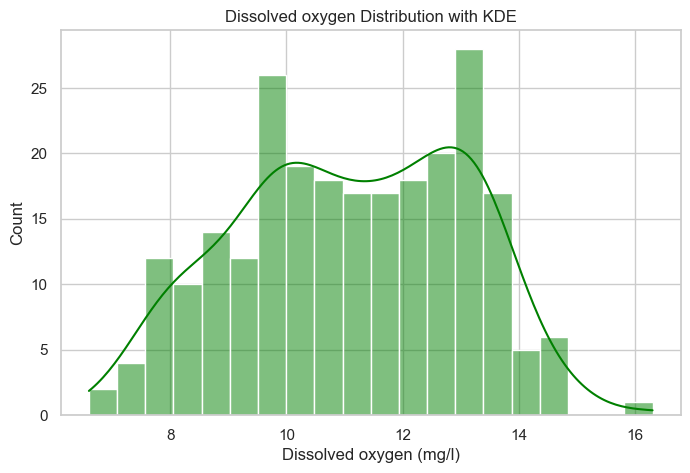

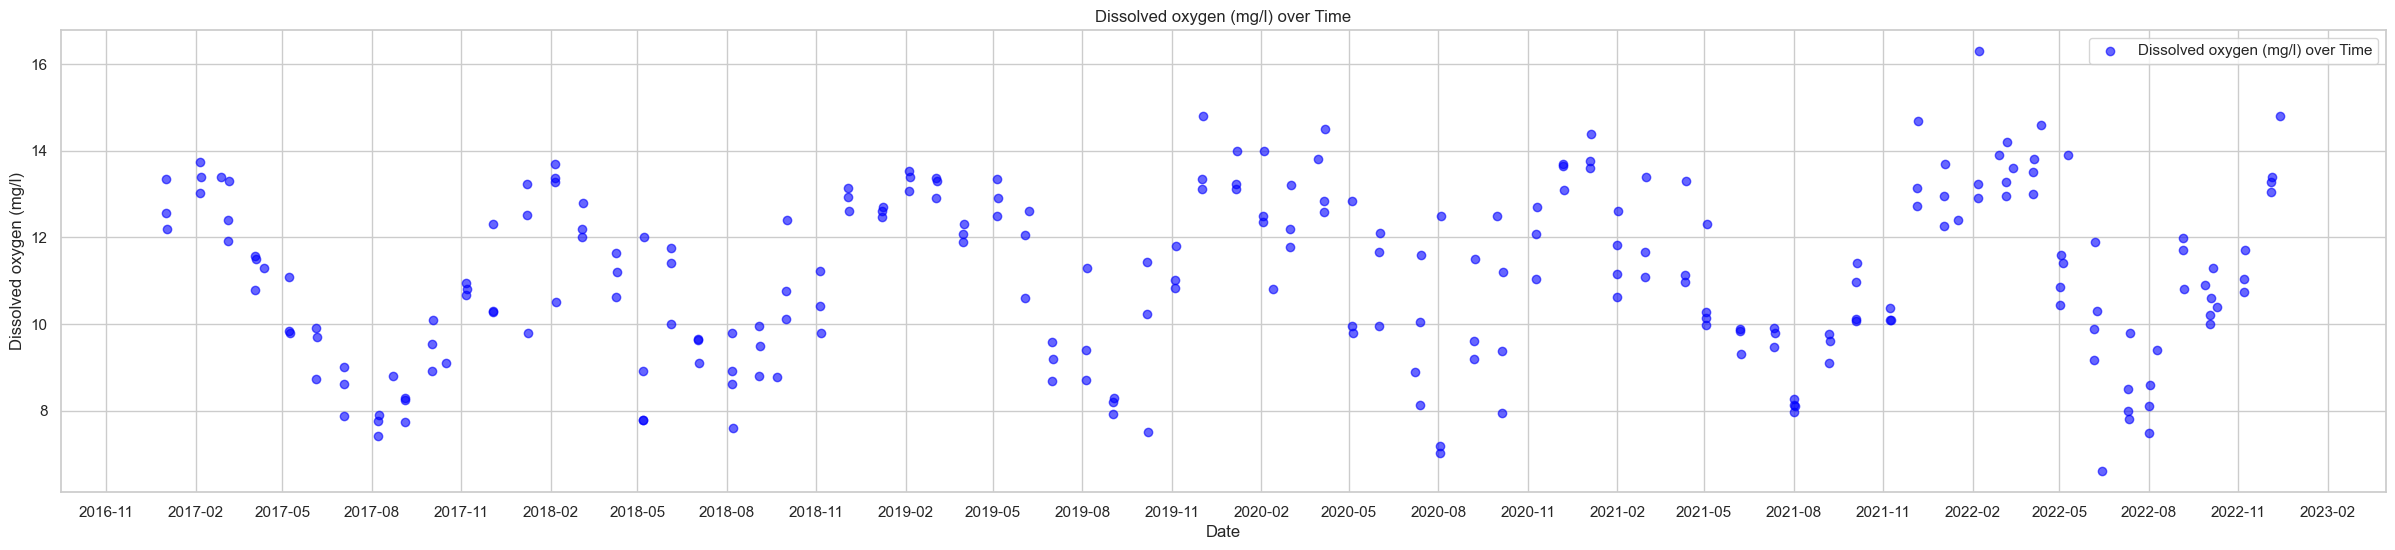

C:\Users\user\AppData\Local\Temp\ipykernel_15612\4111691741.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['deguon_istirpes'] = data_Neris_clean_filled['deguon_istirpes'].fillna(method ='ffill')


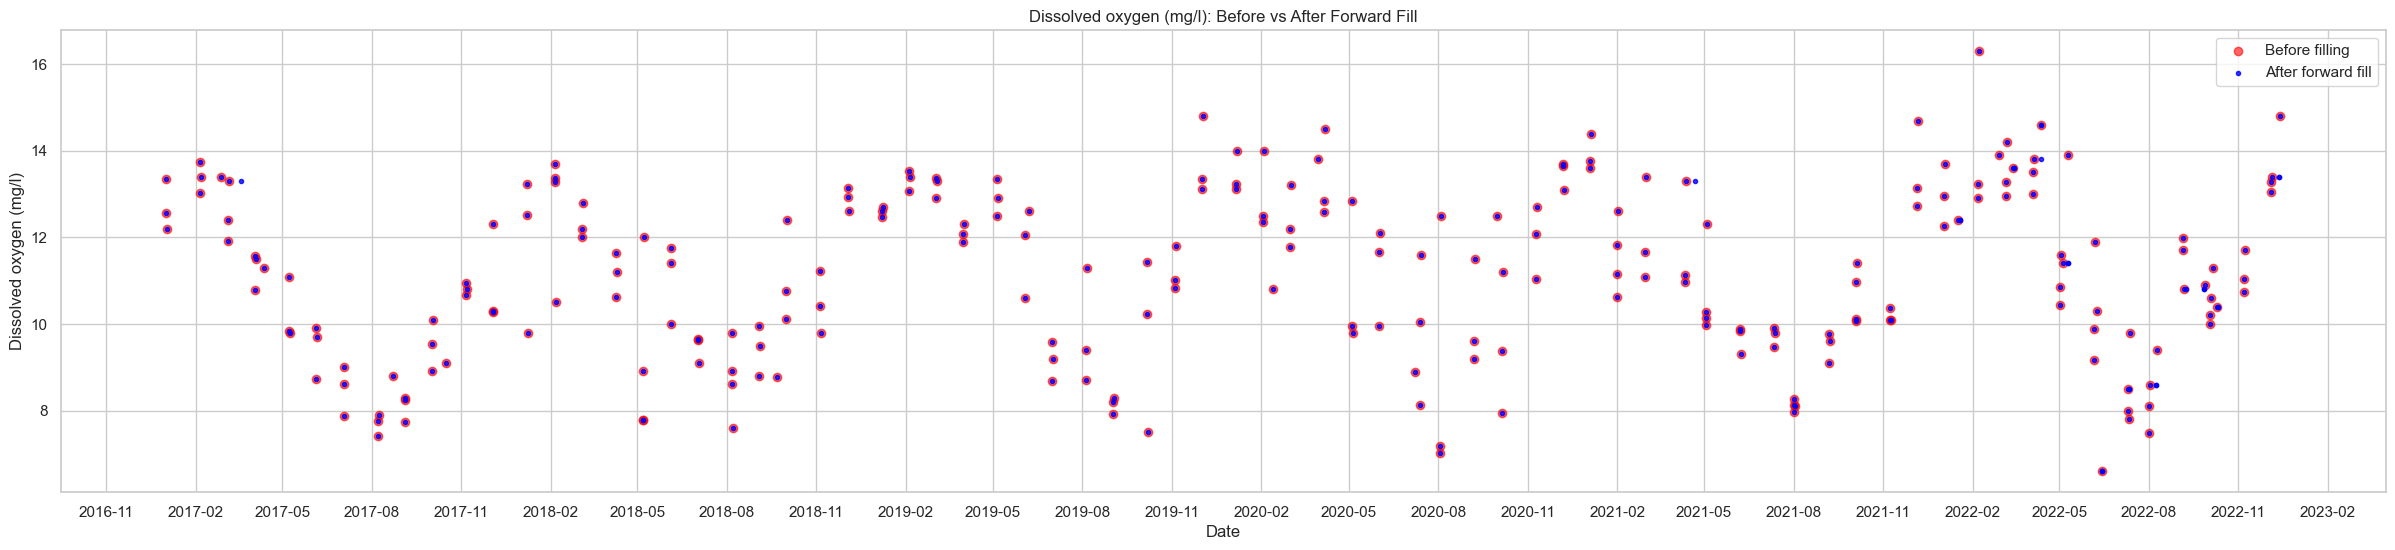

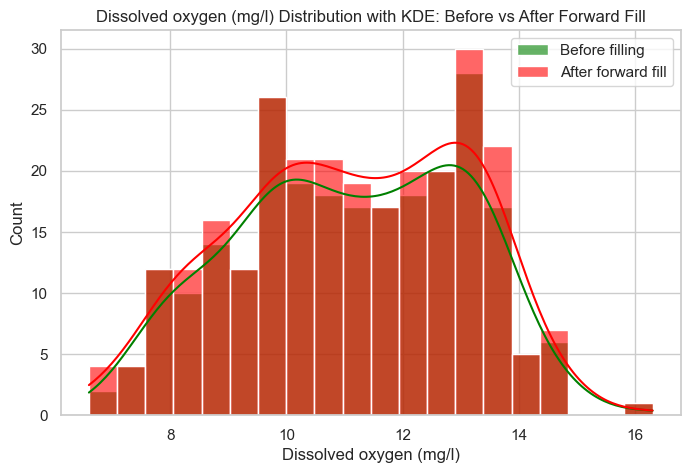

Before filling mean: 11.109186991869919
After filling mean: 11.11553903345725
Before filling median: 11.145
After filling median: 11.15


In [44]:
#Dissolved oxygen in Neris dataset

plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['deguon_istirpes'], bins=20, kde=True, color='green')
plt.title("Dissolved oxygen Distribution with KDE")
plt.xlabel("Dissolved oxygen (mg/l)")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of Dissolved oxygen over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['deguon_istirpes'], label="Dissolved oxygen (mg/l) over Time", alpha=0.6, color='blue')
plt.title("Dissolved oxygen (mg/l) over Time")
plt.xlabel("Date")
plt.ylabel("Dissolved oxygen (mg/l)")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['deguon_istirpes'] = data_Neris_clean_filled['deguon_istirpes'].fillna(method ='ffill')

#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['deguon_istirpes'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['deguon_istirpes'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("Dissolved oxygen (mg/l): Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("Dissolved oxygen (mg/l)")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['deguon_istirpes'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['deguon_istirpes'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("Dissolved oxygen (mg/l) Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("Dissolved oxygen (mg/l)")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking median and mean before vs after data filling
print("Before filling mean:", data_Neris_clean['deguon_istirpes'].mean())
print("After filling mean:", data_Neris_clean_filled['deguon_istirpes'].mean())
print("Before filling median:", data_Neris_clean['deguon_istirpes'].median())
print("After filling median:", data_Neris_clean_filled['deguon_istirpes'].median())

The seasonal plot of dissolved oxygen (DO) confirms a strong cyclical pattern, with higher concentrations observed in colder months and lower concentrations in warmer months. This trend reflects the physical properties of oxygen solubility: cold water can hold more dissolved gas, whereas solubility decreases as temperature rises. These dynamics also explain the bimodal distribution seen in the histogram, with peaks corresponding to winter and summer conditions. The forward fill imputation (blue) closely matched the original data (red), indicating that the method preserved the natural seasonal variability while filling gaps in the time series.

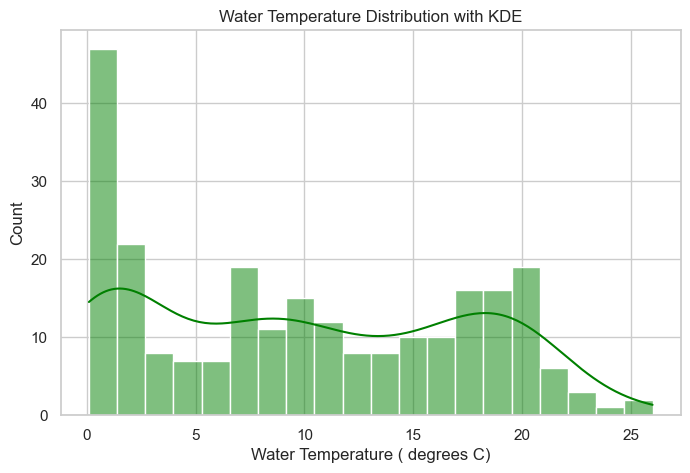

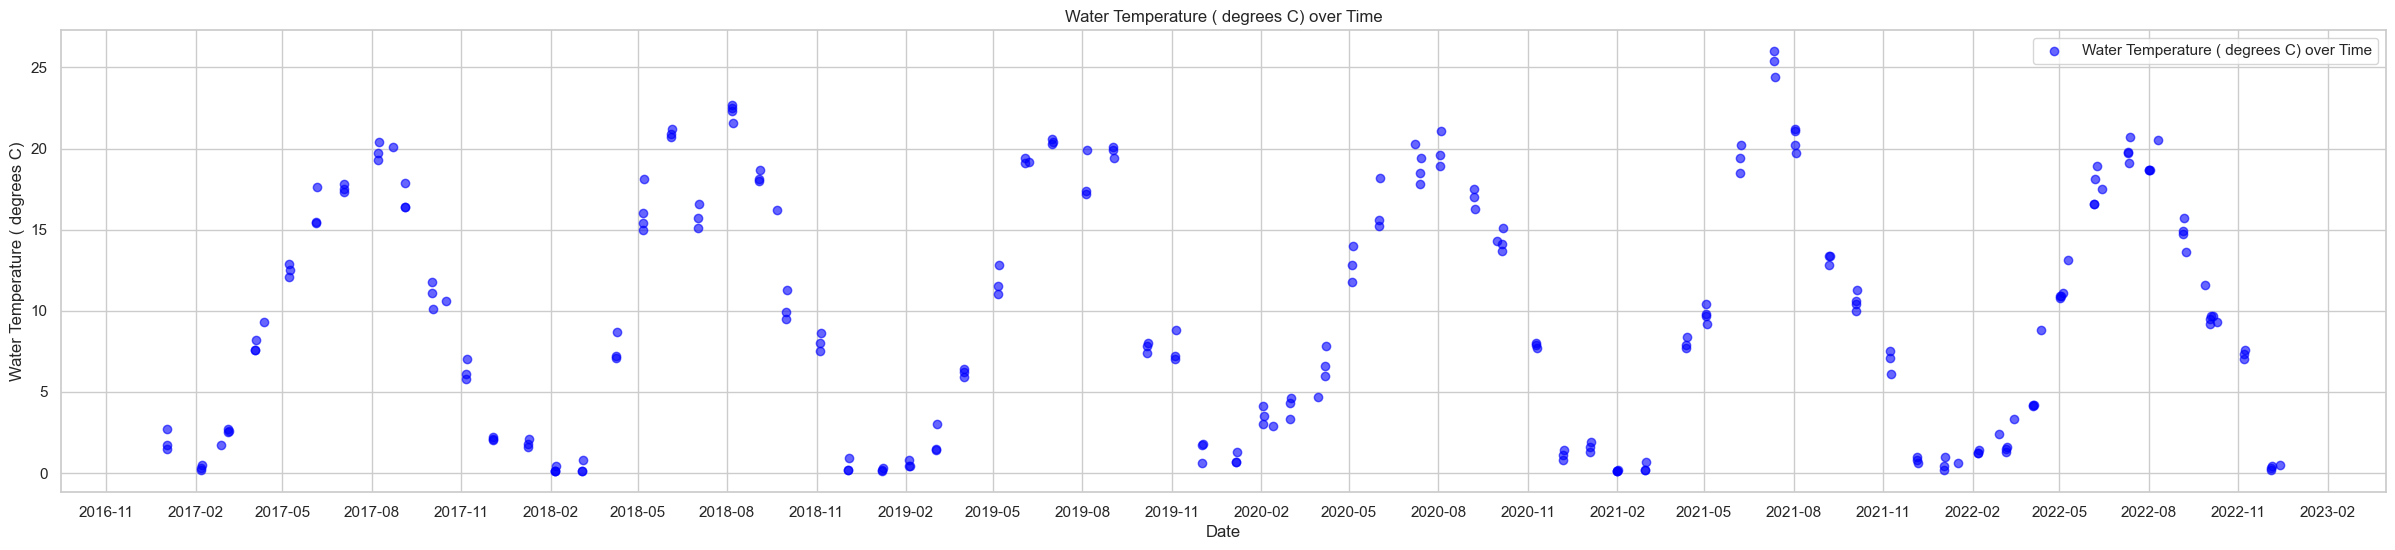

C:\Users\user\AppData\Local\Temp\ipykernel_15612\3193557111.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['vandens_temp'] = data_Neris_clean_filled['vandens_temp'].fillna(method ='ffill')


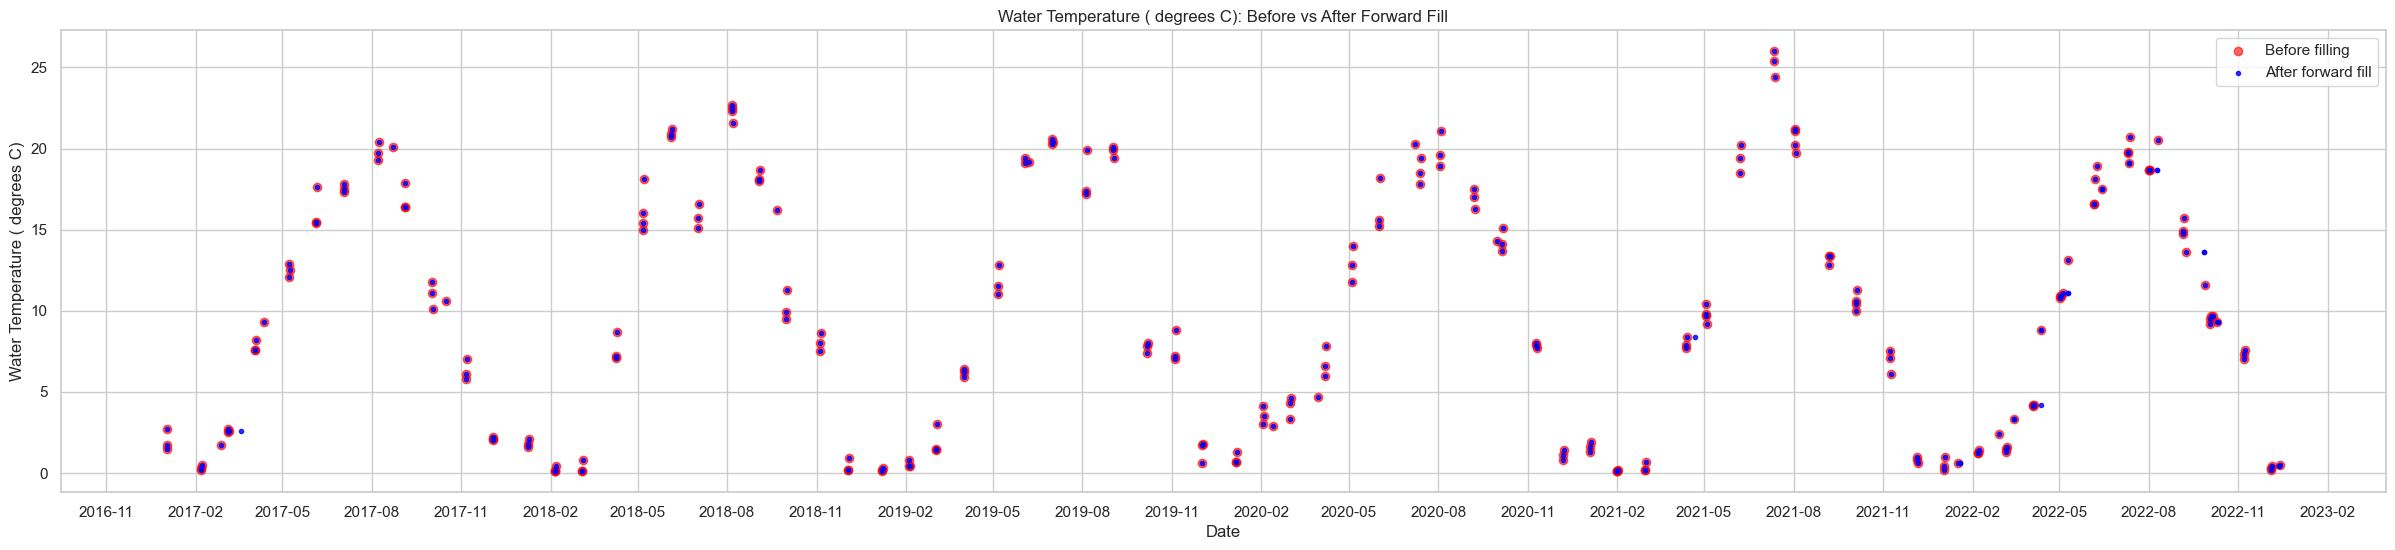

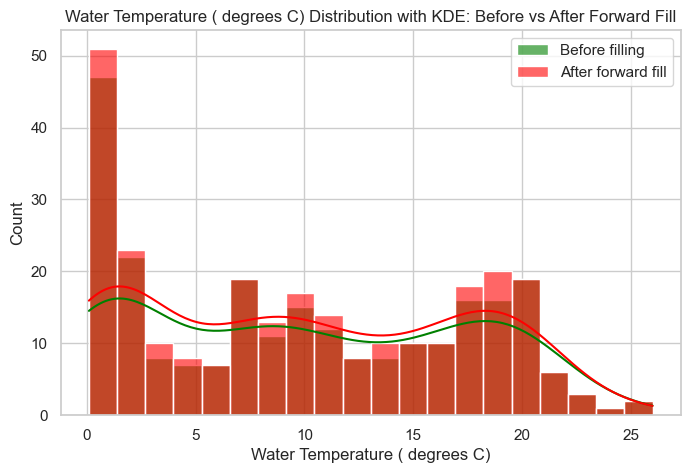

Before filling mean: 9.85502024291498
After filling mean: 9.834163568773233
Before filling median: 9.3
After filling median: 9.3


In [45]:
#Water temperature in Neris dataset

plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['vandens_temp'], bins=20, kde=True, color='green')
plt.title("Water Temperature Distribution with KDE")
plt.xlabel("Water Temperature ( degrees C)")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of Water temperature over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['vandens_temp'], label="Water Temperature ( degrees C) over Time", alpha=0.6, color='blue')
plt.title("Water Temperature ( degrees C) over Time")
plt.xlabel("Date")
plt.ylabel("Water Temperature ( degrees C)")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()


# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of a DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['vandens_temp'] = data_Neris_clean_filled['vandens_temp'].fillna(method ='ffill')

#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['vandens_temp'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['vandens_temp'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("Water Temperature ( degrees C): Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("Water Temperature ( degrees C)")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['vandens_temp'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['vandens_temp'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("Water Temperature ( degrees C) Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("Water Temperature ( degrees C)")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking median and mean before vs after data filling
print("Before filling mean:", data_Neris_clean['vandens_temp'].mean())
print("After filling mean:", data_Neris_clean_filled['vandens_temp'].mean())
print("Before filling median:", data_Neris_clean['vandens_temp'].median())
print("After filling median:", data_Neris_clean_filled['vandens_temp'].median())

The seasonal plot of water temperature confirms the expected cyclical pattern, with higher values recorded during the warmest summer months and peaks typically observed in August. This trend reflects natural climatic conditions, where solar radiation and lower flow rates lead to warming, while cooler temperatures dominate in winter. Water temperature is a key driver of river ecology, as it influences dissolved oxygen availability, biological activity, and chemical reaction rates. In this dataset, the seasonal cycle was clearly preserved, and the forward fill imputation (blue) closely matched the original data (red), indicating that the method effectively filled gaps without distorting the natural temperature dynamics.

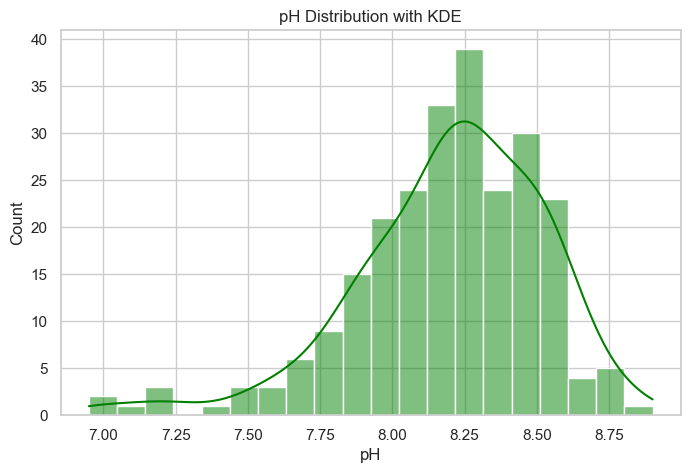

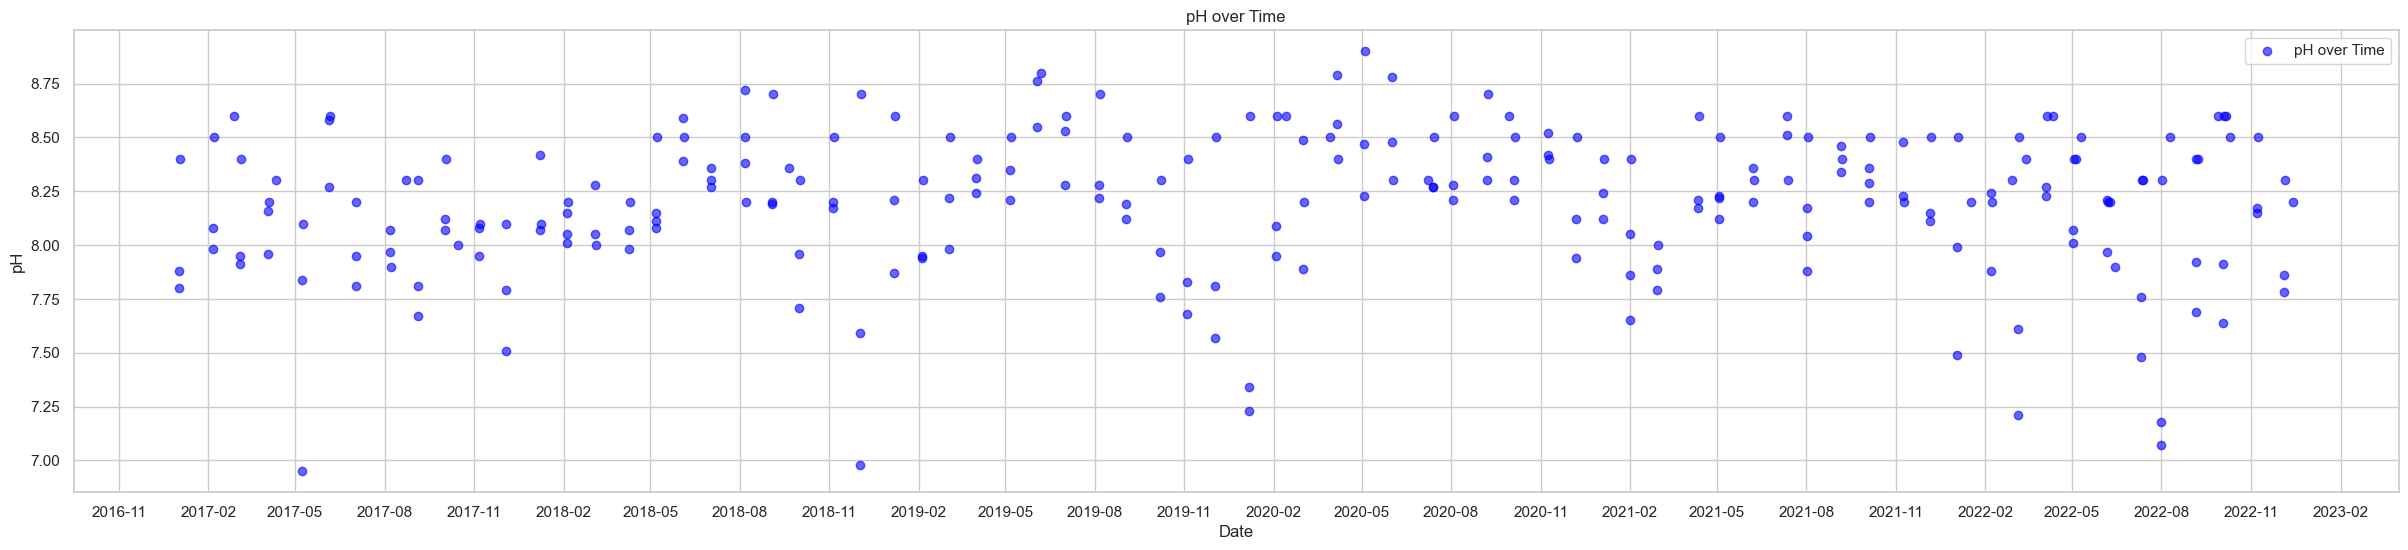

C:\Users\user\AppData\Local\Temp\ipykernel_15612\1032958470.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['ph'] = data_Neris_clean_filled['ph'].fillna(method ='ffill')


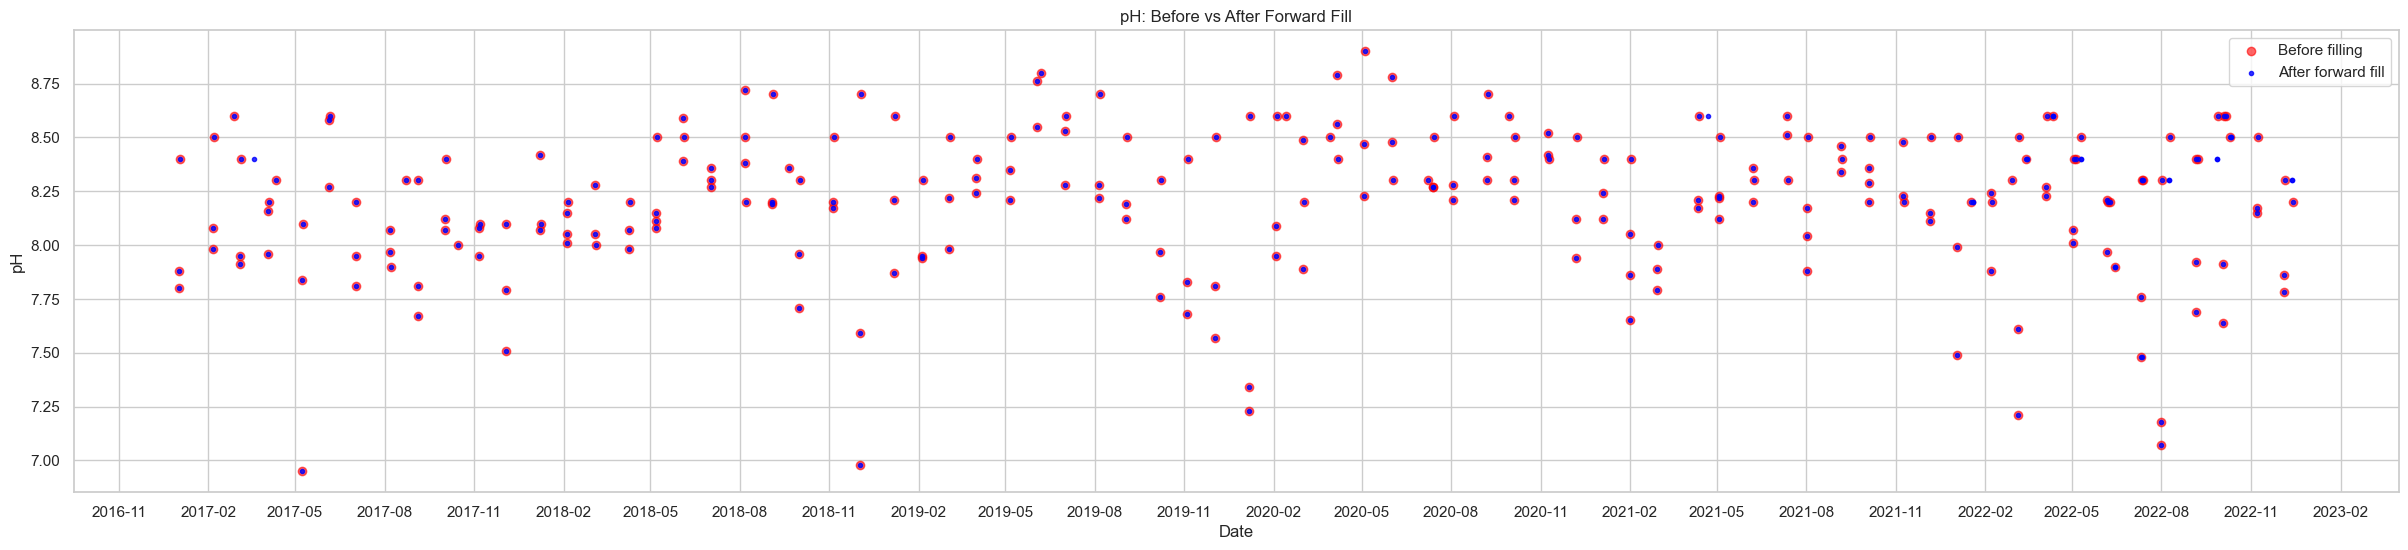

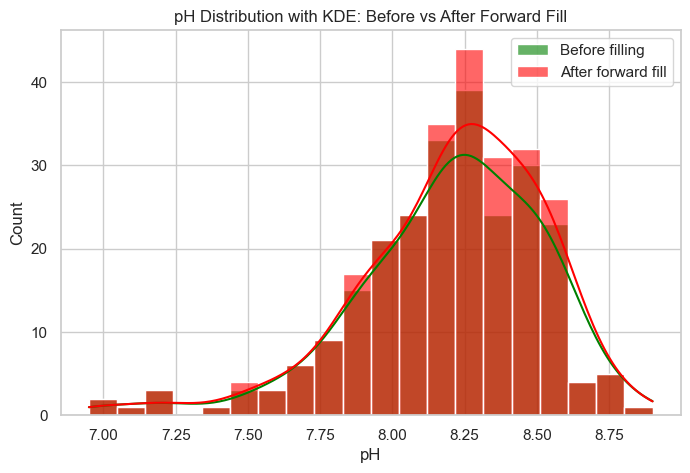

Before filling mean: 8.198987854251012
After filling mean: 8.207918215613384
Before filling median: 8.22
After filling median: 8.24


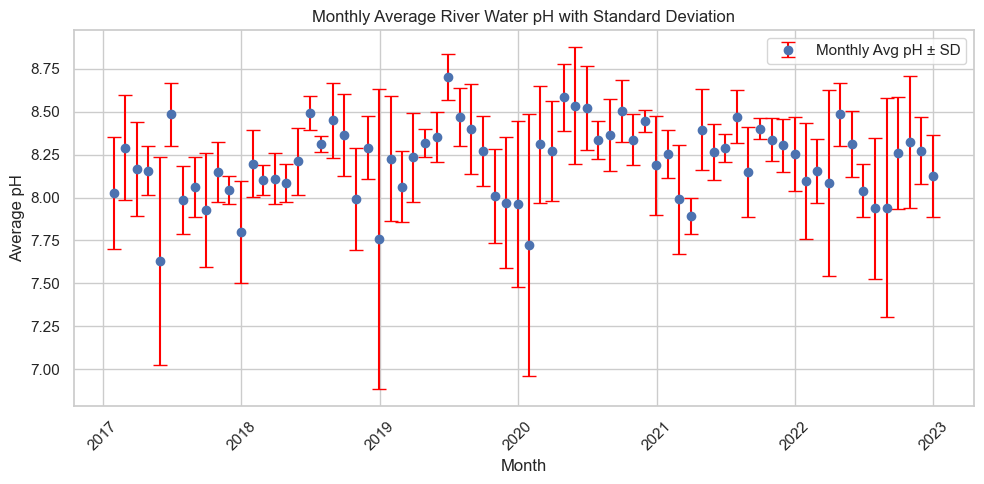

In [46]:
#pH in Neris dataset

plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['ph'], bins=20, kde=True, color='green')
plt.title("pH Distribution with KDE")
plt.xlabel("pH")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of pH over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['ph'], label="pH over Time", alpha=0.6, color='blue')
plt.title("pH over Time")
plt.xlabel("Date")
plt.ylabel("pH")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()


# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of a DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['ph'] = data_Neris_clean_filled['ph'].fillna(method ='ffill')

#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['ph'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['ph'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("pH: Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("pH")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['ph'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['ph'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("pH Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("pH")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking median and mean before vs after data filling
print("Before filling mean:", data_Neris_clean['ph'].mean())
print("After filling mean:", data_Neris_clean_filled['ph'].mean())
print("Before filling median:", data_Neris_clean['ph'].median())
print("After filling median:", data_Neris_clean_filled['ph'].median())


# Set Date as index 
data_Neris_clean_filled.set_index('data', inplace=True)
# Resample by month to get mean and std 
monthly_stats_pH = data_Neris_clean_filled['ph'].resample('ME').agg(['mean', 'std'])
# Plotting as scatter with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(
    monthly_stats_pH.index, 
    monthly_stats_pH['mean'], 
    yerr=monthly_stats_pH['std'], 
    fmt='o',        # scatter markers
    ecolor='red',   # color of error bars
    capsize=5,      # caps on error bars
    markersize=6,
    label='Monthly Avg pH ± SD'
)

plt.title('Monthly Average River Water pH with Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Average pH')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

This dataset represents pH measurements of river water over time. pH indicates the acidity or alkalinity of water on a scale from 0 to 14, with 7 being neutral. In rivers, typical values range from 6.5 to 8.5, and in this dataset values generally varied between 7 and 9, reflecting slightly alkaline conditions. The graph shows relatively stable pH levels, with most maxima observed during the summer months. However, standard deviations of monthly averages frequently overlap, suggesting that fluctuations were not statistically significant. Minor increases or decreases likely correspond to environmental drivers such as rainfall, seasonal photosynthetic activity (highest in summer), or inputs from alkaline soils or industrial discharge. The observed intra-month variability (±0.5–1.0 units) is consistent with moderate photosynthetic activity and normal seasonal dynamics. The forward fill imputation (blue) closely matched the original data (red), indicating that the method preserved seasonal patterns while filling gaps. Overall, the moderately stable pH values align with alkalinity measurements (mostly above 3 mmol/L, whereas high alkalinity is considered >2.5 mmol/L), confirming that the river’s buffering capacity effectively stabilized pH.

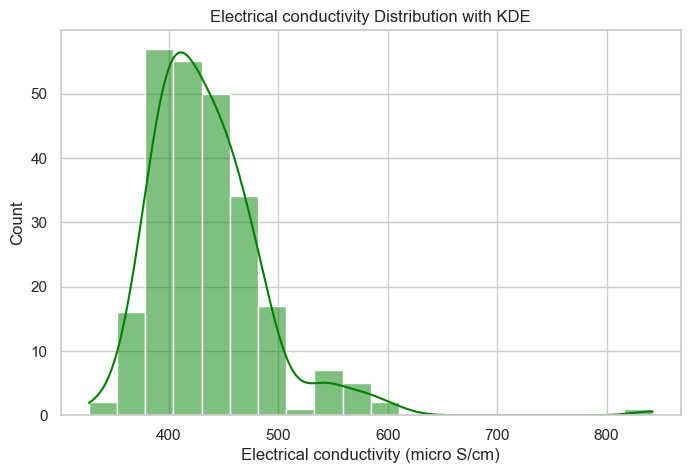

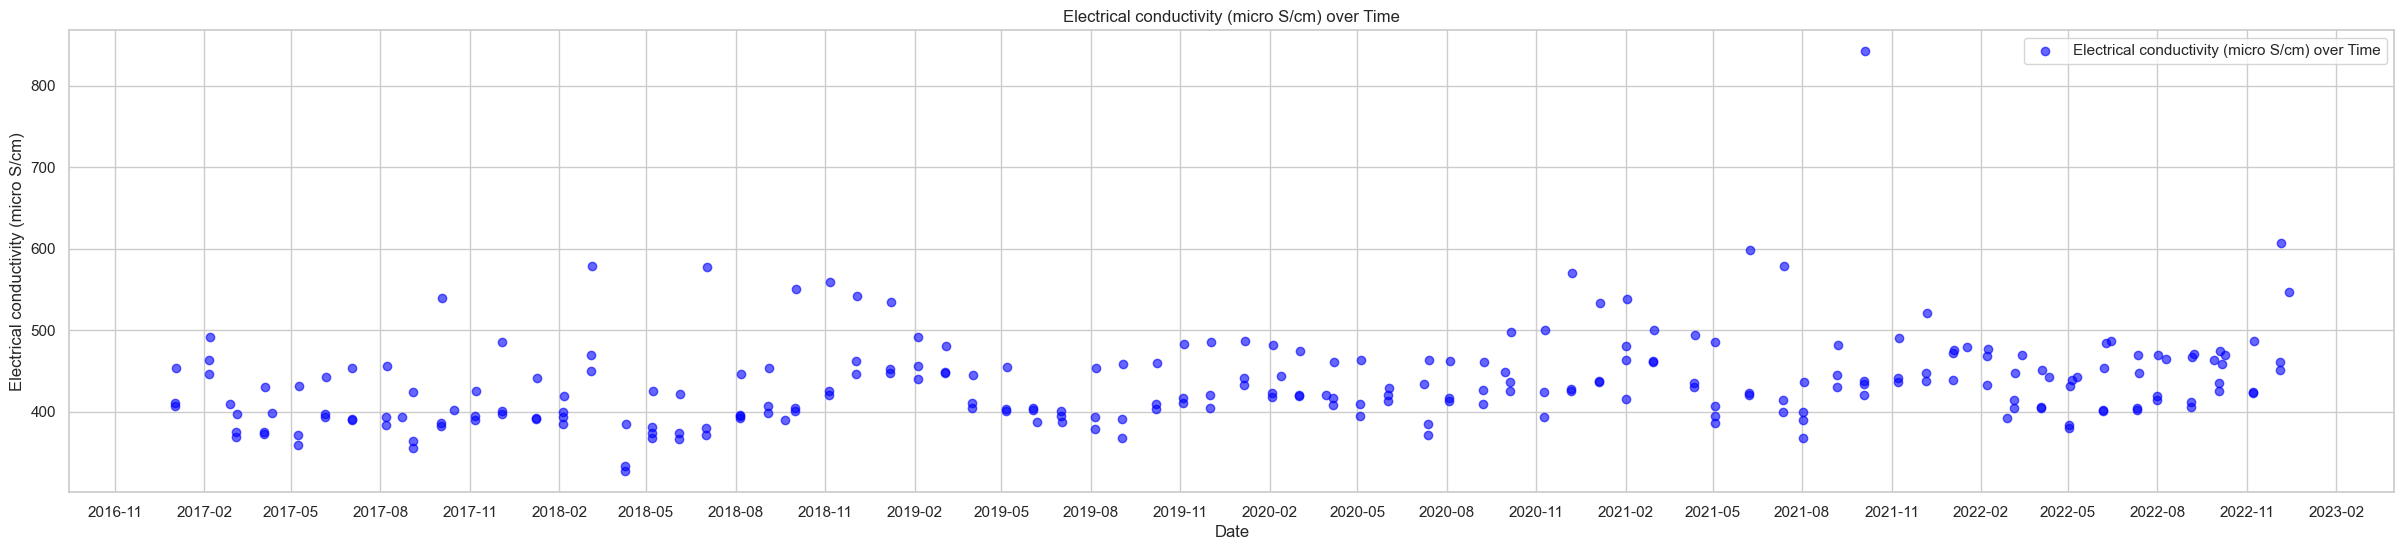

C:\Users\user\AppData\Local\Temp\ipykernel_15612\823529261.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled['elektr_laidis'] = data_Neris_clean_filled['elektr_laidis'].fillna(method ='ffill')


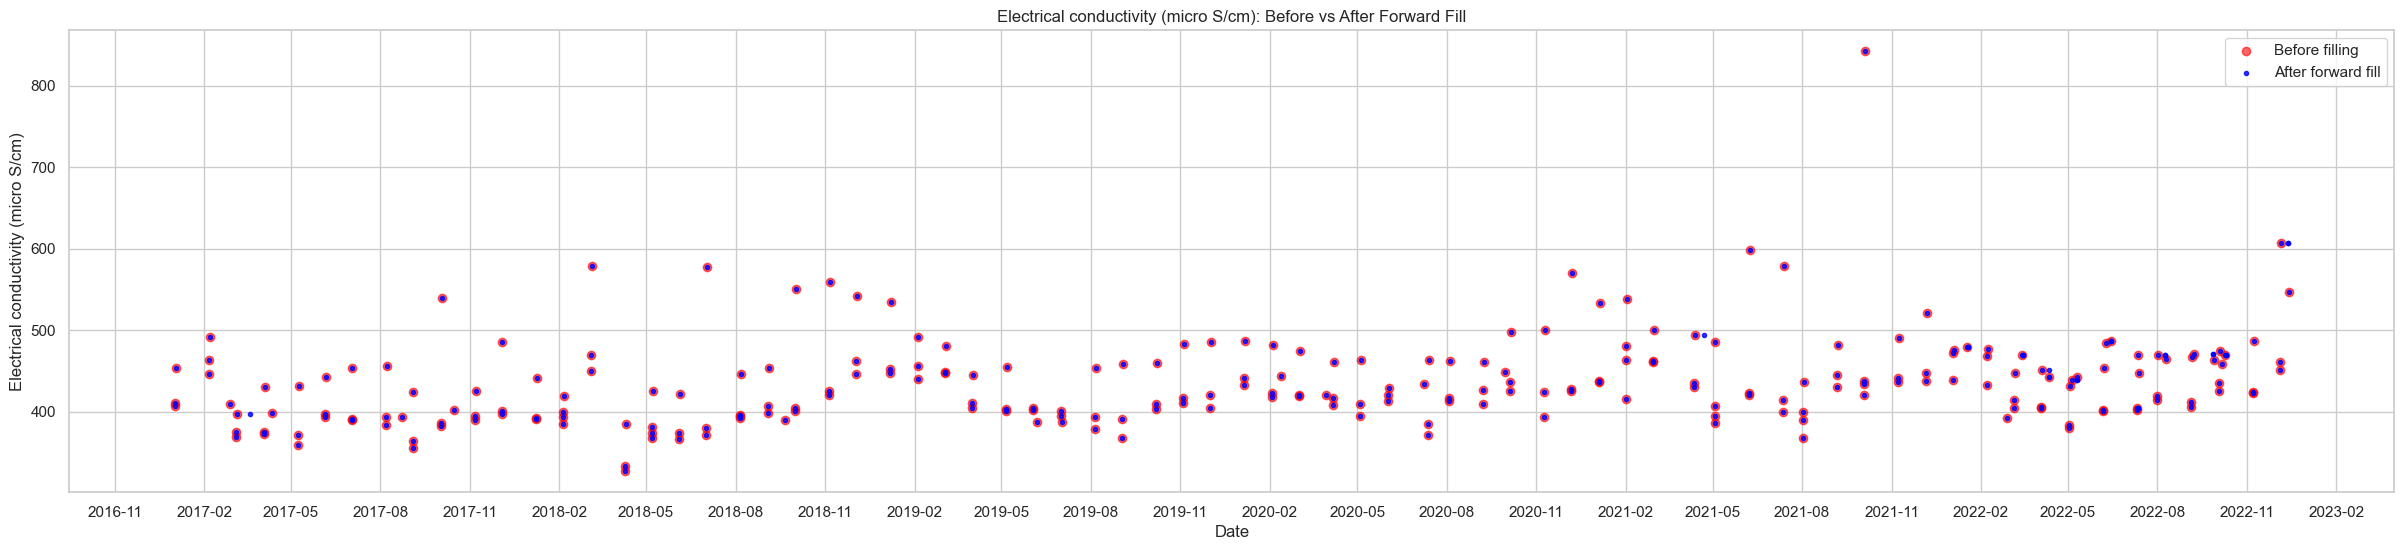

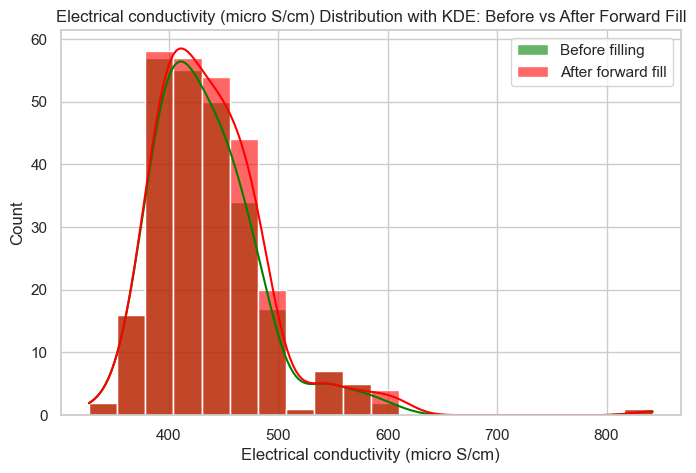

Before filling mean: 434.8744939271255
After filling mean: 437.8996282527881
Before filling median: 426.0
After filling median: 430.0


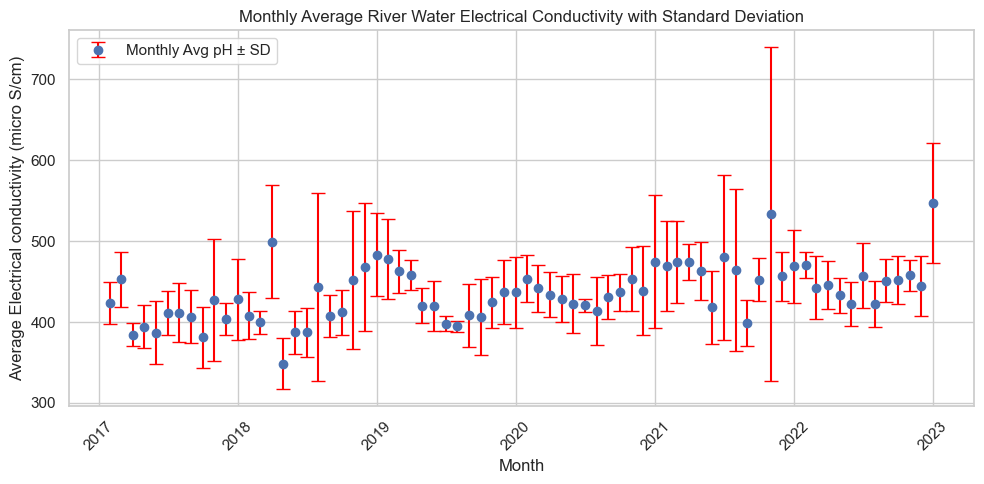

In [47]:
#Electrical conductivity in Neris dataset

plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['elektr_laidis'], bins=20, kde=True, color='green')
plt.title("Electrical conductivity Distribution with KDE")
plt.xlabel("Electrical conductivity (micro S/cm)")
plt.ylabel("Count")
plt.show()
plt.close()

#Checking the distribution of pH over time
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['elektr_laidis'], label="Electrical conductivity (micro S/cm) over Time", alpha=0.6, color='blue')
plt.title("Electrical conductivity (micro S/cm) over Time")
plt.xlabel("Date")
plt.ylabel("Electrical conductivity (micro S/cm)")
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()


# Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')
# Create a copy of a DataFrame
data_Neris_clean_filled = data_Neris_clean.copy()
#Forward fill data gaps
data_Neris_clean_filled['elektr_laidis'] = data_Neris_clean_filled['elektr_laidis'].fillna(method ='ffill')


#checking how distribution over time looks after data filling
# Plot before vs after
plt.figure(figsize=(30,6))
plt.scatter(data_Neris_clean['data'], data_Neris_clean['elektr_laidis'], label="Before filling", color='red', alpha=0.6, marker='o')
plt.scatter(data_Neris_clean_filled['data'], data_Neris_clean_filled['elektr_laidis'], label="After forward fill", color='blue', alpha=0.8, marker='.')
plt.title("Electrical conductivity (micro S/cm): Before vs After Forward Fill")
plt.xlabel("Date")
plt.ylabel("Electrical conductivity (micro S/cm)")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.show()

#checking count distribution before and after filling
plt.figure(figsize=(8,5))
sns.histplot(data_Neris_clean['elektr_laidis'], label="Before filling", bins=20, kde=True, color='green', alpha=0.6)
sns.histplot(data_Neris_clean_filled['elektr_laidis'], label="After forward fill", bins=20, kde=True, color='red', alpha=0.6)
plt.title("Electrical conductivity (micro S/cm) Distribution with KDE: Before vs After Forward Fill")
plt.xlabel("Electrical conductivity (micro S/cm)")
plt.ylabel("Count")
plt.legend()
plt.show()
plt.close()

#Checking median and mean before vs after data filling
print("Before filling mean:", data_Neris_clean['elektr_laidis'].mean())
print("After filling mean:", data_Neris_clean_filled['elektr_laidis'].mean())
print("Before filling median:", data_Neris_clean['elektr_laidis'].median())
print("After filling median:", data_Neris_clean_filled['elektr_laidis'].median())

# Set Date as index 
data_Neris_clean_filled.set_index('data', inplace=True)
# Resample by month to get mean and std 
monthly_stats_conductivity = data_Neris_clean_filled['elektr_laidis'].resample('ME').agg(['mean', 'std'])
# Plotting as scatter with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(
    monthly_stats_conductivity.index, 
    monthly_stats_conductivity['mean'], 
    yerr=monthly_stats_conductivity['std'], 
    fmt='o',        # scatter markers
    ecolor='red',   # color of error bars
    capsize=5,      # caps on error bars
    markersize=6,
    label='Monthly Avg pH ± SD'
)

plt.title('Monthly Average River Water Electrical Conductivity with Standard Deviation')
plt.xlabel('Month')
plt.ylabel('Average Electrical conductivity (micro S/cm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Electrical conductivity (EC) serves as a proxy for the total concentration of dissolved ions, and the observed values indicate moderate mineral content typical of freshwater rivers. Typical river water EC ranges between 150 and 500 µS/cm, corresponding to normal mineral and nutrient levels. As shown in the monthly averages graph, conductivity values in nearly all cases remained within this expected range. The few data points above 500 µS/cm still fall within error margins, as their standard deviations overlap with typical freshwater values; these higher values may reflect natural factors such as low flow conditions concentrating ions or increased runoff after rainfall events. The forward fill imputation (blue) closely matched the original data (red), suggesting that the method preserved seasonal dynamics while effectively filling gaps in the time series

4. Filling all data with forward filling method combined in one dataset and checking how it worked

In [48]:
#Sort by date
data_Neris_clean = data_Neris_clean.sort_values(by='data')

# Create a copy
data_Neris_clean_filled = data_Neris_clean.copy()

# Forward fill all columns at once
data_Neris_clean_filled = data_Neris_clean_filled.fillna(method='ffill')

#Saving data in files
data_Neris_clean_filled.to_excel("../data/neris_clean_filled.xlsx", index=False)
data_Neris_clean_filled.to_csv("../data/neris_clean_filled.csv", index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_15612\749027325.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_Neris_clean_filled = data_Neris_clean_filled.fillna(method='ffill')


In [49]:


# Missing values for river Neris
missing_percent_Neris_after_filling = (data_Neris_clean_filled.isna().mean() * 100).sort_values(ascending=False)
print("\nPercentage of missing values per column Neris:\n")
print(missing_percent_Neris_after_filling)




Percentage of missing values per column Neris:

_id                  0.0
telkinio_pav         0.0
m_vietos_pav         0.0
data                 0.0
vandens_temp         0.0
suspend_medziagos    0.0
sarmingumas          0.0
deguon_istirpes      0.0
ph                   0.0
elektr_laidis        0.0
dtype: float64


5. Exploratory Data Analysis

In [50]:
# Summary statistics
summary = data_Neris_clean_filled[['vandens_temp','deguon_istirpes','ph','sarmingumas','elektr_laidis','suspend_medziagos']].describe()
summary.rename(columns={
    'vandens_temp': 'Water Temperature (°C)',
    'deguon_istirpes': 'Dissolved Oxygen (mg/L)',
    'ph': 'pH',
    'sarmingumas': 'Alkalinity (mmol/L)',
    'elektr_laidis': 'Electrical Conductivity (µS/cm)',
    'suspend_medziagos': 'Dissolved Substances (mg/L)'
}, inplace=True)
print(summary)

       Water Temperature (°C)  Dissolved Oxygen (mg/L)          pH  \
count              269.000000               269.000000  269.000000   
mean                 9.834164                11.110260    8.210967   
std                  7.370904                 1.989691    0.324085   
min                  0.100000                 6.600000    6.950000   
25%                  2.100000                 9.770000    8.050000   
50%                  9.300000                11.150000    8.240000   
75%                 17.200000                12.840000    8.420000   
max                 26.000000                16.300000    8.900000   

       Alkalinity (mmol/L)  Electrical Conductivity (µS/cm)  \
count           269.000000                       269.000000   
mean              3.710409                       438.375465   
std               0.532546                        54.400844   
min               2.000000                       327.000000   
25%               3.400000                       401.0

EDA of the Neris River dataset shows that water temperature ranges from 0.1°C to 26°C (mean ~9.9°C), reflecting the strong seasonal warming in summer and cooling in winter, as observed in the time series and monthly averages plots. Dissolved oxygen varied between 6.6 and 16.3 mg/L (mean ~11.1 mg/L), exhibiting an inverse seasonal pattern relative to temperature, consistent with solubility dynamics and the clear negative correlation (-0.73) highlighted in the scatter plot (below). pH remained moderately stable, mostly between 6.95 and 8.9 (mean 8.2), with minor seasonal fluctuations, supporting the buffered conditions indicated by alkalinity values generally between 3–4 mmol/L (25% to 75% percentile). Electrical conductivity averaged ~435 µS/cm, mostly within typical freshwater ranges, with occasional peaks aligning with the monthly averages and standard deviation plots. Dissolved substances showed the highest relative variability (2–43 mg/L, mean ~8.3 mg/L), with some late spring and summer peaks visible in the normalized and monthly plots. Overall, the descriptive statistics quantitatively confirm the patterns observed in the figures: stable baseline conditions with clear seasonal cycles, natural variability, and occasional extreme values across all measured parameters.

Large std or wide range in dissolved substances or EC may reflect episodic inputs or seasonal changes.

Small std in pH and alkalinity suggests stable chemical conditions.


6. Relationships Between Variables

Correlation matrix to identify linnear correlations

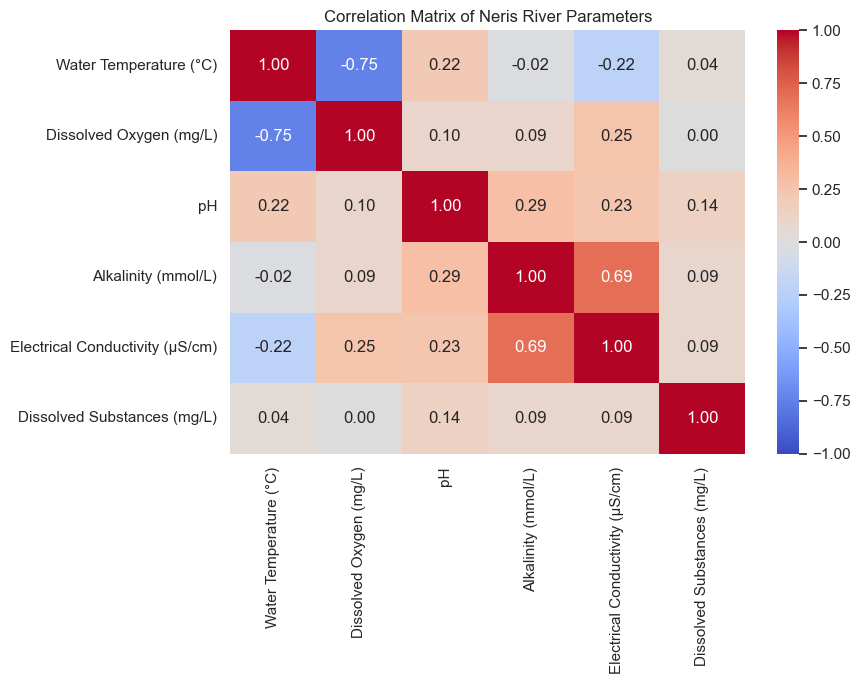

In [51]:
corr_matrix = data_Neris_clean_filled[['vandens_temp','deguon_istirpes','ph','sarmingumas','elektr_laidis','suspend_medziagos']].corr()

# Create a mapping for nicer names
friendly_names = {
    'vandens_temp': 'Water Temperature (°C)',
    'deguon_istirpes': 'Dissolved Oxygen (mg/L)',
    'ph': 'pH',
    'sarmingumas': 'Alkalinity (mmol/L)',
    'elektr_laidis': 'Electrical Conductivity (µS/cm)',
    'suspend_medziagos': 'Dissolved Substances (mg/L)'
}

# Replace column names for the heatmap
corr_matrix.rename(index=friendly_names, columns=friendly_names, inplace=True)

# Plot heatmap with friendly names
plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Neris River Parameters')
plt.tight_layout()
plt.show()


For interparameter analysis, I decided to focus on three variable pairs that showed the strongest linear relationships in the correlation matrix. Water temperature and dissolved oxygen were chosen due to their strong negative correlation (-0.74), reflecting the expected inverse solubility dynamics. Alkalinity and electrical conductivity were selected because of their strong positive correlation (0.72), highlighting linked chemical processes in the river. Finally, pH and alkalinity were included due to their moderate positive correlation (0.30), illustrating the buffering effect of alkalinity on river pH. These pairs were prioritized because they combine physically and chemically meaningful relationships, providing insight into key interactions that govern river water quality.

6.1 Water temperature vs Dissolved oxygen

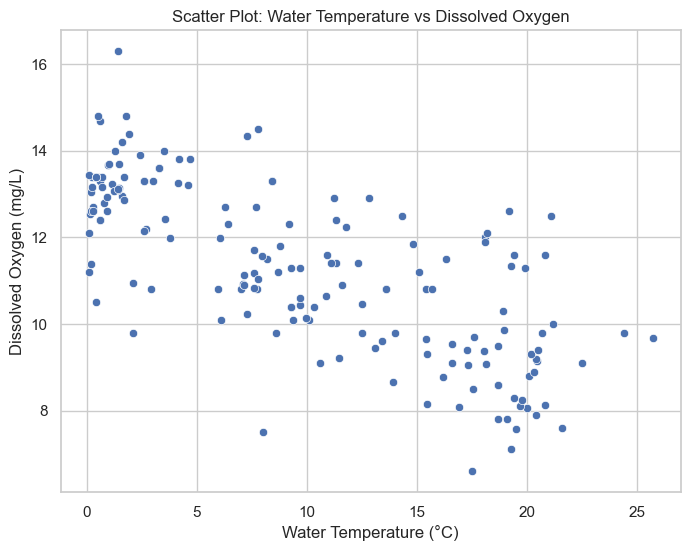

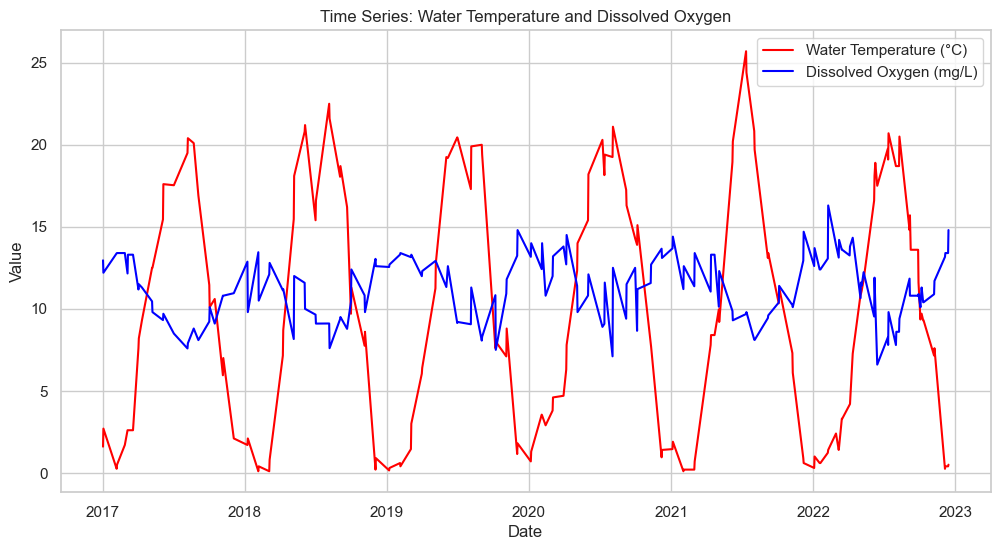

Correlation between Water Temperature and Dissolved Oxygen: -0.74


In [52]:
# Group by date and calculate daily averages for the two columns, since sometimes there are several daily measurements
daily_avg = data_Neris_clean_filled.groupby('data')[['vandens_temp','deguon_istirpes']].mean().reset_index()

# 1. Scatter plot: Water temperature vs Dissolved Oxygen
plt.figure(figsize=(8,6))
sns.scatterplot(x='vandens_temp', y='deguon_istirpes', data=daily_avg)
plt.xlabel('Water Temperature (°C)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.title('Scatter Plot: Water Temperature vs Dissolved Oxygen')
plt.show()

# 2. Time series plot: Both parameters over time
plt.figure(figsize=(12,6))
plt.plot(daily_avg['data'], daily_avg['vandens_temp'], label='Water Temperature (°C)', color='red')
plt.plot(daily_avg['data'], daily_avg['deguon_istirpes'], label='Dissolved Oxygen (mg/L)', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series: Water Temperature and Dissolved Oxygen')
plt.legend()
plt.show()

# 3. Correlation coefficient
correlation = daily_avg['vandens_temp'].corr(daily_avg['deguon_istirpes'])
print(f'Correlation between Water Temperature and Dissolved Oxygen: {correlation:.2f}')


Analysis of water temperature and dissolved oxygen in the Neris River shows a clear inverse relationship, with a correlation coefficient of -0.73 (the slight difference from other calculations is due to rounding and the use of daily averages). Higher temperatures in summer coincide with lower dissolved oxygen concentrations, while colder winter months correspond to higher oxygen levels. This pattern is consistent across daily averages and reflects the expected physical solubility behavior of oxygen in water. The time series comparison further confirms that the seasonal cycles of these two parameters are closely coupled but in opposite directions, providing insight into their interparameter dynamics over time.

6.2 Alkalinity vs Electrical Conductivity

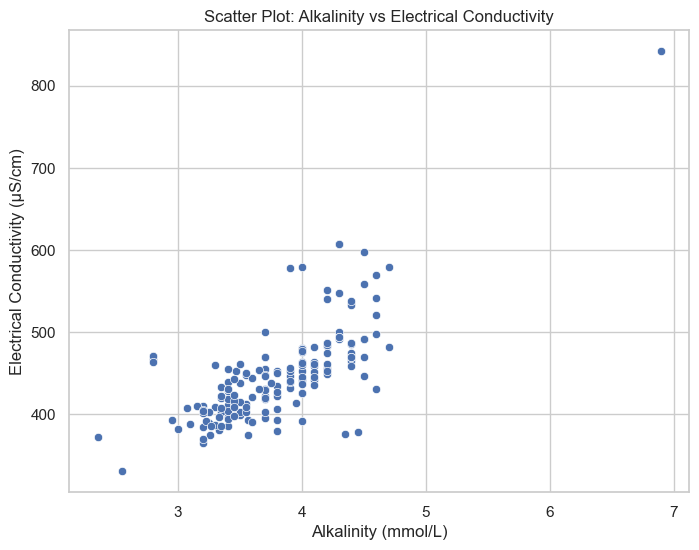

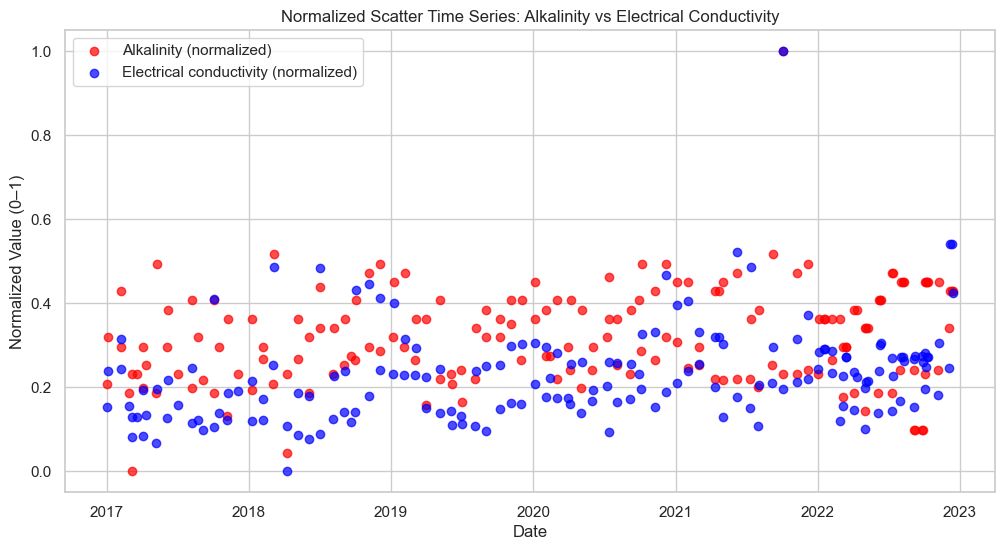

Correlation between Alkalinity and Electrical Conductivity: 0.73


In [53]:
# Group by date and calculate daily averages
daily_avg = data_Neris_clean_filled.groupby('data')[['sarmingumas','elektr_laidis']].mean().reset_index()

# Min-max normalization
daily_avg['sarmingumas_norm'] = (daily_avg['sarmingumas'] - daily_avg['sarmingumas'].min()) / (daily_avg['sarmingumas'].max() - daily_avg['sarmingumas'].min())
daily_avg['elektr_laidis_norm'] = (daily_avg['elektr_laidis'] - daily_avg['elektr_laidis'].min()) / (daily_avg['elektr_laidis'].max() - daily_avg['elektr_laidis'].min())

# 1. Scatter plot (optional, original scale)
plt.figure(figsize=(8,6))
sns.scatterplot(x='sarmingumas', y='elektr_laidis', data=daily_avg)
plt.xlabel('Alkalinity (mmol/L)')
plt.ylabel('Electrical Conductivity (µS/cm)')
plt.title('Scatter Plot: Alkalinity vs Electrical Conductivity')
plt.show()

# Scatter time series plot
plt.figure(figsize=(12,6))
plt.scatter(daily_avg['data'], daily_avg['sarmingumas_norm'], label='Alkalinity (normalized)', color='red', alpha=0.7)
plt.scatter(daily_avg['data'], daily_avg['elektr_laidis_norm'], label='Electrical conductivity (normalized)', color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Normalized Value (0–1)')
plt.title('Normalized Scatter Time Series: Alkalinity vs Electrical Conductivity')
plt.legend()
plt.show()

# 3. Correlation coefficient (original scale)
correlation = daily_avg['sarmingumas'].corr(daily_avg['elektr_laidis'])
print(f'Correlation between Alkalinity and Electrical Conductivity: {correlation:.2f}')

The relationship between alkalinity and electrical conductivity proved to be strongly positive, with correlation coefficients of 0.72 using the raw forward-filled dataset and 0.79 after applying daily averaging and normalization. The difference reflects the effect of data preprocessing: daily aggregation reduces within-day noise, while normalization minimizes the influence of scale differences and outliers. Despite these methodological differences, both results consistently demonstrate that alkalinity and electrical conductivity rise and fall together, driven by their shared dependence on dissolved ions. This alignment confirms that electrical conductivity can serve as a robust indicator of underlying chemical conditions in the river, with alkalinity providing complementary information about buffering capacity.

6.3 Alkalinity vs pH

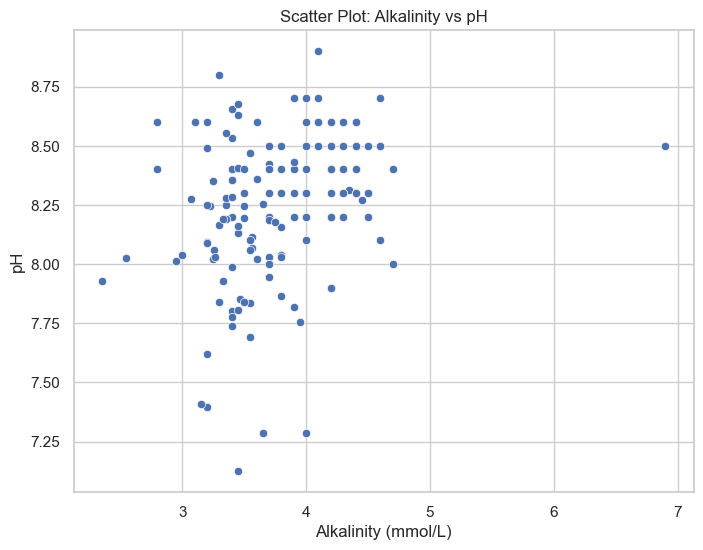

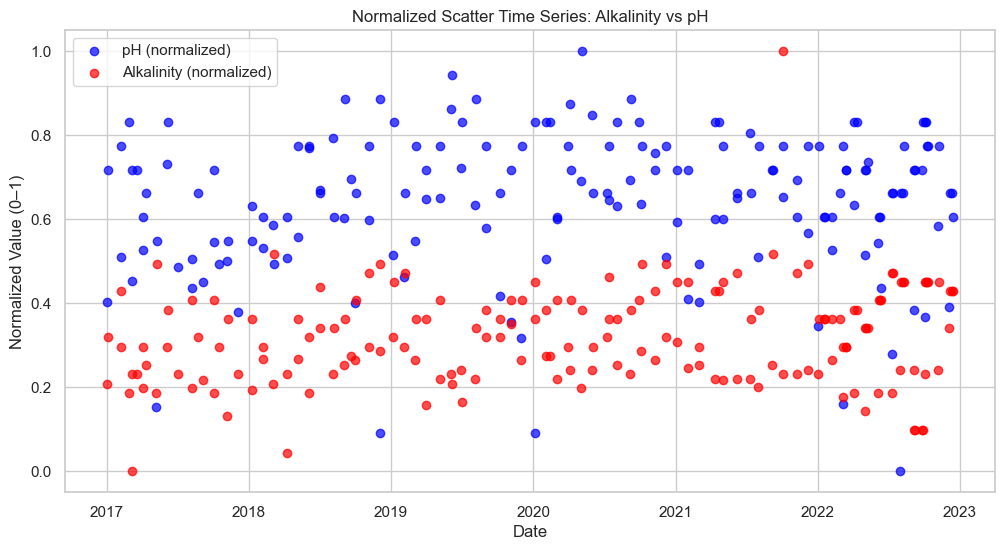

Correlation between Alkalinity and pH: 0.30


In [54]:
#Group by date and calculate daily averages
daily_avg = data_Neris_clean_filled.groupby('data')[['ph','sarmingumas']].mean().reset_index()

# Min-max normalization
daily_avg['ph_norm'] = (daily_avg['ph'] - daily_avg['ph'].min()) / (daily_avg['ph'].max() - daily_avg['ph'].min())
daily_avg['sarmingumas_norm'] = (daily_avg['sarmingumas'] - daily_avg['sarmingumas'].min()) / (daily_avg['sarmingumas'].max() - daily_avg['sarmingumas'].min())

# 1. Scatter plot (original scale)
plt.figure(figsize=(8,6))
sns.scatterplot(x='sarmingumas', y='ph', data=daily_avg)
plt.xlabel('Alkalinity (mmol/L)')
plt.ylabel('pH')
plt.title('Scatter Plot: Alkalinity vs pH')
plt.show()

# 2. Scatter time series plot (normalized)
plt.figure(figsize=(12,6))
plt.scatter(daily_avg['data'], daily_avg['ph_norm'], label='pH (normalized)', color='blue', alpha=0.7)
plt.scatter(daily_avg['data'], daily_avg['sarmingumas_norm'], label='Alkalinity (normalized)', color='red', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Normalized Value (0–1)')
plt.title('Normalized Scatter Time Series: Alkalinity vs pH')
plt.legend()
plt.show()

# 3. Correlation coefficient (original scale)
correlation = daily_avg['ph'].corr(daily_avg['sarmingumas'])
print(f'Correlation between Alkalinity and pH: {correlation:.2f}')

The correlation between pH and alkalinity was moderate (0.30 in raw data, 0.33 after daily averaging and normalization), with the slight increase reflecting reduced noise from preprocessing. This positive relationship is consistent with alkalinity’s role as a buffer that stabilizes pH and supports slightly alkaline conditions. However, the modest strength of the correlation shows that other factors, such as photosynthetic activity or external inputs, also influence pH dynamics.

Conclusion

In this project, I analyzed time-series data on Lithuanian river to better understand water quality dynamics. The analysis focused on three main goals: identifying trends over time, handling missing data, and exploring interdependencies between water quality indicators.

Key findings:

•	Trends over time: Analysis of the Neris River time series shows clear seasonal patterns in several parameters. Water temperature peaks in summer and declines in winter, while dissolved oxygen exhibits an inverse pattern (reflected in a strong negative correlation -0.73), with higher values in colder months. pH remains moderately stable, generally slightly alkaline, with minor fluctuations across months. Electrical conductivity mostly stays within typical freshwater ranges, with occasional higher values, and dissolved substances show noisy temporal patterns with some late spring–summer peaks. Overall, the river’s physical and chemical parameters demonstrate consistent seasonal cycles alongside year-to-year variability.

•	Handling missing data: 
To address missing data, I applied forward filling across all measured parameters, which provided a complete dataset for calculating monthly and seasonal trends. This approach was suitable for daily measurements where gradual changes dominate, but it may smooth out short-term variability or sudden events. While adequate for the scope of this study, future work could explore interpolation or model-based methods to better capture dynamics during longer gaps.

•	Interdependencies: 
Three key interparameter relationships were analyzed: water temperature vs. dissolved oxygen, alkalinity vs. electrical conductivity, and pH vs. alkalinity. Temperature and dissolved oxygen showed a strong negative correlation (~–0.73), reflecting oxygen’s reduced solubility in warmer water. Alkalinity and electrical conductivity were strongly positively correlated (0.72–0.79), indicating linked chemical processes and confirming conductivity as a proxy for ion concentration. pH and alkalinity displayed a moderate positive correlation (0.30–0.33), consistent with alkalinity’s buffering role while highlighting other influences on pH variability. These results demonstrate how physical and chemical parameters interact to shape water quality in the Neris River.